# Introduction
최근 Decision Support Systems(DSSs)가 판매업, 스포츠 등 다양한 분야에 AI를 접목하기 시작했다. 그러나 AI 기반 DSSs에 사용되는 예측 모델은 일반적으로 투명성이 부족하고 결과만 내놓는다. 이는 오용(너무 맹신하는 경우)과 불용(너무 믿지 않는 경우)을 초래한다.

투명성의 부족은 설명가능한 AI(XAI)의 개발을 촉진했고, 이는 사람이 납득할만한 설명을 AI가 만들도록 하는 것이다. 설명의 목표는 부정확한 예측을 알아채도록 돕는 것이며 특히 의학 분야에서 매우 중요하다. XAI가 제공하는 설명은 모델의 강점과 약점을 강조하고 미래에는 어떻게 작동할지를 예측해야만 한다.

XAI는 두 종류가 있다: 지역적과 전역적. 지역적 설명은 개별 예측에 대한 이유에 집중하며 전역적 설명은 모델 전체에 대한 정보를 제공한다. 지역적 설명은 각 사례에 대한 설명을 제공할 수 있다는 강점이 있으나 몇 가지 단점을 가지고 있다. 예를 들어, 견고성이 부족하여 각 사례에서 약간의 차이가 엄청 큰 설명의 차이를 만들어낼 수 있거나 불안정하여 같은 모델과 같은 사례를 사용했음에도 다른 결과가 나올 수 있다. 견고성과 안정성이 부족하면 설명에 대한 수준을 평가할 때 문제가 된다. 충실도(fidelity) 같은 모델의 행동을 설명이 얼마나 잘 포착했는지를 측정하는 지표가 설명 품질을 정확하게 파악하지 못하는데, 상세한 설명 방법에 너무나도 의존하고 있기 때문이다. 더구나 가장 좋은 설명 기술조차도 모델 불확실성(uncertainty)이나 의존성(reliability)에 대해 한정된 인사이트를 제공한다. 최근 연구는 모델의 투명성을 강화하기 위해 불확실성 추정의 역할(uncertainty estimation's role)을 강조하고 있다. 불확실성을 잘 보정하는 것이 투명한 의사 결정을 촉진하는 데 중요한 요소로 강조되고 있으나 복잡한 문제에 대해 정확하게 보정된 불확실성 추정치를 얻는데 어려움과 복잡성을 지적한다. 또한 보정 기술보다는 주로 잘 보정된 모델(Bayesian 등)을 쓰는 것에 집중되고 있다.

대부분의 분류기가 내놓는 확률 추정치는 일반적으로 분류에서 지역적 설명 방법에서의 각 클래스의 가능성을 나타내는 지표로 사용된다. 하지만 이런 분류기들이 대체로 보정이 잘 안 되어있어 확률 추정치가 실제 정답 확률을 충실하게 나타내지 않는다고 널리 인식되어 있다. Platt Scaling이나 Venn-Abers(VA) 같은 특화된 보정 기술이 이러한 단점을 해결하기 위해 제안되어왔다. VA 방법은 각 예측값에 연관된 확률 범위를 생성, 정규화를 활용하여 적절하게 보정된 확률 추정치로 개선하였다.

의사결정을 위해 VA 접근법을 채택할 때, 이 기술이 개별 클래스에 대해 구간을 제공한다는 것을 반드시 인식하고 있어야 한다. 이런 구간들이 확률 추정치 내의 불확실성을 정량화하고 설명적인 관점에서 귀중한 인사이트를 제공한다. 구간의 폭은 모델의 불확실성 수준에 직접적으로 반응하여 구간이 좁을수록 확률 추정치에 대한 신뢰도가 높다는 것을 의미한다. 반대로 넓은 구간은 추정이 꽤 불확실하다는 것을 알려준다. 게다가 이런 불확실성 정보가 피처-예측 확률 추정치에 기반한 피처 가중치에까지 확장될 수 있다. 불확실성을 정량화할 수 있다는 것은 XAI의 품질과 유용성을 개선시킬 수 있다. 최근 지역적 설명법이며, 피처 불확실성을 측정하기 위해 VA로 계산되는 구간을 사용한 Calibrated Explanations(CE) for classification이 소개되었다.

존재하는 설명법이 회귀가 매우 치명적인 상황에서 쓰이고 있다는 사실에도 불구하고 거의 대부분이 분류의 결정을 설명하는데 집중되어 있다. 회귀에 특화된 설명 기술이 없어, 분류에 맞게 디자인된 기법을 회귀에 적용하는 것이 흔하기 때문에 회귀에 잘 맞는 설명법을 찾는 것이 각광받고 있다.

이 연구의 목적은 VA처럼 분류를 위해 제공된 CE로 피처 가중치의 불확실성을 정량화하는 것이 회귀에서도 가능하다는 것을 보여주는 설명법을 제안하는 것이다. 등각 예측(conformal prediction) 프레임워크는 회귀에서 불확실성을 정량화하기 위한 여러 다른 기술을 제공한다. 이 논문에서는 불확실성 추정을 위한 등각 예측 시스템(Conformal Predictive System) (CPSs) 기술을 CE에 사용하여 회귀에서의 불확실성 추정을 통해 보정된 설명을 생성할 수 있도록 한다. CPS를 사용하는 것은 불확실성을 정량화하는 툴을 제공하는 유연한 기술 뿐만 아니라 사용자가 정의한 임계값보다 값이 위에 있는지 확률을 측정하도록 해준다. 이에 기초하여 회귀를 위한 확률적 설명의 새로운 모습을 이 논문에서는 제안한다. 이런 접근법은 유저 친화적이며 모델에 구애받지 않아 사용하기 쉽고 다양한 모델에 적용할 수 있다.

요약하자면 이 논문은 아래 특징을 갖는 회귀를 목적으로 한 CE의 확장을 소개한다.
- 빠르고, 믿을 수 있고, 안정적이고 견고한 회귀에서의 피처 중요도 설명
- CPSs의 어플리케이션을 통해 모델의 예측값을 보정
- 모델 예측의 불확실성 정량화와 CPS에서 파생된 등각 예측 분포(conformal predictive distributuon) (CPD) 쿼리를 통한 피처 중요도 가중치
- 유저가 정의한 임계값을 넘는 예측 확률에 대한 설명을 생성할 수 있음
- 피처 값과 목표값 관계를 간단하게 해석할 수 있는 규칙
- 기대 이상의 불확실성(혹은 임계값을 넘을 확률)을 정량화하여 반사실적 규칙을 생성할 수 있음

# Background

## Post-Hoc Explanation Methods
XAI 연구는 크게 두 가지 종류로 나뉜다: 본질적으로 해석 가능하고 투명한 모델 개발과 불투명한 모델을 설명하기 위해 사후 방법(*post-hoc*)을 활용하는 것이다. 사후 설명법은 피처와 모델의 예측값 사이의 관계를 간단하고 해석 가능하도록 구축하는 기술이다. 지역적(local)이든 전역적(global)이든 이러한 설명법은 보통 픽셀 표현, 피처 중요도 차트, 워드 클라우드 같은 시각적 보조 도구를 활용한다. 이러한 시각 도구들은 모델 예측값을 만들어낸 피처, 픽셀 혹은 단어를 강조한다.

두 개의 표현 접근법이 존재한다: 피처 값이 직접적으로 예측값에 영향을 줄 때를 찾는 사실적(*factual*) 설명과 피처 값이 바뀔 때 예측값에 주는 잠재적 영향을 탐색하는 반사실적(*counterfactual*) 설명법이 있다. 중요한 것은 반사실적 설명법은 본질적으로 지역적으로 국한된다는 점이다. 이는 특히나 인간 친화적이며, 인간의 추론이 작동하는 방식이 반영되어있다.

## Essential Characteristics of Explanations
고품질의 XAI를 만들어내는 것은 Human-Coumputer Interaction(HCI)와 머신 러닝(ML) 양쪽의 지식을 갖고 접근할 것을 요구한다. 설명법의 품질은 가고자 하는 방향에 따라 갈린다. 예를 들어, 사용자가 설명 인터페이스를 평가하는 것과 설명이 모델을 잘 설명하는 것은 다른 이야기다. 그러나 몇 특성은 사후 설명법에 있어서 공통적으로 필요하다. 설명법이 모델을 정확하게 반영하는 것이 중요하며, 설명법이 모델에 대한 높은 수준의 충실도(fidelity)를 가져야 한다는 개념과 면밀한 관련이 있다. 따라서 신뢰할 수 있는 설명은 모델의 동작을 정확하게 반영하기 위해 추정치에 대한 실제 영향과 정확히 일치하는 피처 가중치를 가져야 한다. 즉, 잘 보정되어야 한다.

안정성(Stability)와 견고성(Robustness)은 설명법의 두 가지 중요한 추가적 기능이다. 안정성은 설명의 일관성을 의미하며, 동일한 사례와 모델이 여러 번 반복하더라도 동일한 설명을 생성해야 한다. 반면 견고성은 사례가 작은 외란을 겪어나 상황이 변경되더라도 설명법이 일관된 결과를 낼 수 있는 능력을 말한다. 따라서 XAI 설명법의 본질적 특성은 신뢰성, 안정성, 견고성이다.

## Explanations for classification and regression
분류와 회귀에 대한 설명법을 구분하는 건 제공하는 인사이트의 성격으로 할 수 있다. 분류에서는 미리 정의된 클래스 집합에서 사례가 속한 특정 클래스를 예측하는 작업이 포함된다. 모델이 제공하는 확률 추정치로 각 클래스에 대한 모델의 신뢰 수준을 반영한다. 클래스 예측의 근거를 명확히 하기 위해 분류기를 설명하는 다양한 기법이 개발되었다. `SHAP`, `LIME`, `Anchor` 같은 것이 그러한 기법들이다. 이러한 것들은 특정 클래스 라벨로 예측하는데 기여하는 요인에 대해 자세히 설명한다. 일반적으로 텍스트 데이터의 단어나 이미지의 픽셀과 같은 피처 중요도 개념을 활용하여 설명한다.

회귀에서는 미리 정해진 클래스나 범주형 값이 없기 때문에 패러다임이 다르다. 대신 각 사례는 숫자 값과 연관되어 예측은 이 값의 근사치를 구하기 위해 노력한다. 따라서 회귀 모델에 대한 설명은 사전 정의된 클래스의 프레임워크에 의존할 수 없다. 그럼에도 분류기를 위해 설계된 설명 기법은 회귀에도 적용할 수 있고 사례의 예측값에 피처를 연관시키는 데 집중시킨다.

##  Calibrated Explanations for Classification (CEC)
아래 설명에서 *사실적 설명* 은 *불확실 구간* 과 *사실적 피처 규칙* 의 모임을 수반하는 모델로부터 *보정된 예측* 으로 이루어져 있으며, 각각은 *불확실 구간을 갖는 피처 가중치* 와 피처 사례 값을 다루는 *사실적 조건* 으로 구성되어 있다. *반사실적 설명* 은 *반사실적 피처 규칙* 모임만 포함하며, 각 규칙은 *불확실 구간을 갖는 예측 추정치* 와 *반사실적 조건* 으로 이루어져 있으며 해당 피처의 대체 사례 값을 다룬다. 예측 추정치는 분류의 경우 확률 추정치를 나타내지만 회귀의 경우 예측 추정치는 잠재적 예측으로 표현된다.

> In the following descriptions, a *factual explanation* is composed of a *calibrated prediction* from the underlying model accompanied by an *uncertainty interval* and a collection of *factual feature rules*, each composed of a *feature weight with an uncertainty interval* and a *factual condition*, covering that feature’s instance value. *Counterfactual explanations* only contain a collection of *counterfactual feature rules*, each composed of a *prediction estimate with an uncertainty interval* and a *counterfactual condition*, covering alternative instance values for the feature. The prediction estimate represents a probability estimate for classification, whereas for regression, the prediction estimate will be expressed as a potential prediction.

### Venn-Abers predictors
확률적 예측기는 클래스 라벨과 함께 확률 분포를 제공한다. 이러한 예측을 검증하는 것은 도전적이나, 보정하는 것은 예측값과 관측된 확률을 정렬하는데 집중한다. 목표는 예측 확률이 실제와 딱 맞아 떨어지도록 모델을 잘 보정하는 것이다. Venn 예측기는 신뢰 기반의 확률 구간으로 변환해서 다중-확률 예측을 만들어낸다.

귀납적 Venn 예측은 확률 추정을 위한 보정 데이터를 분류하는 Venn 분류법(taxonomy)이 포함된다. 각 카테고리 내에서 테스트 사례가 카테고리에 속할 것으로 예상되는 확률은 해당 카테고리의 모든 보정된 사례 중 각 클래스 라벨의 상대적 빈도다.

Venn-Abers 예측기(VA)는 등방성(isotonic) 회귀를 통해 자동화된 분류법 최적화를 제공하여, 동적 확률 구간을 도입한다. 두 클래스 점수 분류기(scoring classifier)는 테스트 오브젝트 $x_i$에 예측 점수 $s(x_i)$를 할당한다. 점수가 높을수록 positive 클래스에 대한 신뢰성이 높아진다. 모델을 보정하기 위해 일부 데이터는 반드시 떼어놓고 보정용 데이터셋으로 사용해야 한다. 순차적으로 오브젝트 $x_i$와 라벨 $y_i$로 이루어진 훈련 셋 $\left\{ z_1, ...,z_i,...,z_n\right\}$을 훈련 셋 $Z_T$와 보정 셋 $\left\{z_1,...,z_l\right\}$로 적절히 나눈다. 점수 분류기를 $Z_T$로 훈련시키고 $\left\{x_1,...,x_l,x_{n+1}\right\}$에 대해 $s$를 계산한다. 귀납적 VA 예측은 다음 과정을 따른다:
1. $\left\{ \left\{s_1,y_1\right\},...,\left\{s_l,y_l\right\},\left\{s_{n+1},y_{n+1}=0\right\} \right\}$과 $\left\{ \left\{s_1,y_1\right\},...,\left\{s_l,y_l\right\},\left\{s_{n+1},y_{n+1}=1\right\}\right\}$ 각각을 사용하여 등방성 보정기 $g_0$와 $g_1$을 유도한다.
2. $y_{n+1}=1$에 대한 확률 분포는 $\left[ g_0\left(s_{n+1}\right),g_1\left(s_{n+1}\right)\right]$이다. (이후 구간의 하한과 상한을 $\left[\mathcal{P_l}, \mathcal{P_h}\right]$로 표현)
3. $y_{n+1}=1$에 대해 정규화된 확률 추정값을 다음 추천식에 따라 얻는다:
$\mathcal{P}=\frac{\mathcal{P_h}}{1-\mathcal{P_l}+\mathcal{P_h}}$

요약하면 VA는 확률 구간 $\left[\mathcal{P_l}, \mathcal{P_h}\right]$을 사용하여 보정된 (정규화) 확률 추정 $\mathcal{P}$를 만들어낸다.

###  Factual Explanations for Classification
적절한 훈련 셋 $Z_T$로 훈련된 점수 분류기가 있고 테스트 사례 $x_{n+1}$을 위한 지역적 설명을 생성하기를 원한다고 가정해보자. 우리는 피처 집합 $F$를 두 카테고리로 분류한다: 범주형 피처 $C$와 수치형 피처 $N$. 피처 $f \in F$의 모든 피처값을 $V_f$라 하고 $f_v$를 피처 $f$의 값 $v$의 인덱스라고 하자. 테스트 사례 $x_{n+1}$의 특정 피처값을 $f_v'$라고 하자. 보정기로써 VA가 만들어낸 테스트 사례 $x_{n+1}$에 대해 확률 구간 $\left[\mathcal{P_l}, \mathcal{P_h}\right]$과 보정된 확률 추정치 $\mathcal{P}$를 이용하여 설명 프로세스는 다음 절차를 따른다:
1. 수치형 피처 $N$에 대한 임계값과 조건(≤, >)을 설정하는 이산기(discretizer)를 정의한다. `LIME` 이산기 또는 아래 설명된 `LIME`의 서브클래스를 이산기로 사용한다. 범주형 피처에 대해서는 동일 조건(=)에 기초한 규칙을 갖는다.
2. 각 피처 $f \in F$에 대해:
    - 만약 $f \in C$라면
    
        a) 모든 가능한 범주형 값 $v \in V_f$에 대해 반복한다. 원래 값을 제외한 피처값 $v$마다 원래 값 $x_{n+1}^f$를 대체한 하나의 교란 사례(perturbed instance)를 생성한다. 그 결과로 교란 사례 $x_{n+1}^{f_v}=v$가 된다. ($f_v$는 피처 $f$의 값 $v$의 인덱스)
        
        b) 교란 사례들에 대해 확률 구간 $\left[\mathcal{P_l^{f_v}}, \mathcal{P_h^{f_v}}\right]$과 보정된 확률 추정치 $\mathcal{P^{f_v}}$를 계산 및 기록한다.
        
        c) `f = v`라는 사례값 $v$를 포함하는 사실적 조건을 형성한다.
        
    - 만약 $f \in N$라면
    
        a) 이산기의 임계값을 활용하여 피처값 $x_{n+1}^f$ 근처 가장 가까운 하한 또는 상한 임계값을 식별한다. 피처 $f$에 대해 보정 집합에 있는 모든 가능한 피처값으로 $V_f$를 임계값 이하, 초과 조건인 두 그룹으로 나눈다.
        
        b) 각 그룹에서 백분위수 $pv$에 해당하는 25%, 50%, 75% 분위수를 뽑아낸다.
        
        c) 각 그룹에서 백분위수 $pv$에 대해 반복하며 교란 사례 $x_{n+1}^{f_{pv}}=pv$를 얻도록 피처값 $x^f_{n+1}$을 $f_{pv}$로 대체하는 교란 사례를 만든다. 보정기를 교란 사례에 적용하고 확률 구간 $\left[\mathcal{P_l^{f_{pv}}}, \mathcal{P_h^{f_{pv}}}\right]$과 보정된 확률 추정치 $\mathcal{P^{f_{pv}}}$를 계산 및 기록한다.
        
        d) 다음 그룹으로 진행하기 전에 그룹 내 모든 백분위수 값에 대한 평균을 계산한다. 이것으로 각 그룹에 대해 확률 구간 $\left[\mathcal{P_l^{f_v}}, \mathcal{P_h^{f_v}}\right]$과 보정된 확률 추정치 $\mathcal{P^{f_v}}$를 얻는다.
        
        e) $f_v'$를 테스트 사례의 피처값 $x^f_{n+1}$를 포함하는 그룹의 인덱스라고 하자.
        
        f) `Discretizer`를 사용하여 사례값 $v$를 포함하는 사실적 조건을 형성한다. 규칙은 `f ≤ v`이거나 `f > v`이다.
    
    Step 2를 마무리한다: 사례값과 피처 가중치를 포함하는 사실적 조건으로 이루어진 피처 $f$에 대한 규칙을 형성한다. $\mathcal{P}$와 인덱스 $f_v'$를 제외한 모든 $\mathcal{P^{f_v}}$(그리고 $\left[\mathcal{P_l^{f_{v}}}, \mathcal{P_h^{f_{v}}}\right]$)의 평균의 차이를 피처 $f$의 피처 가중치(그리고 구간 가중치)로써 계산한다. $\mathcal{P} = \mathcal{P^{f_v'}}$이기 때문이다. 보정된 예측값과 상하한에 대한 가중치는 아래로 계산된다:
    
    $w^f = \mathcal{P}-\frac{1}{|V_f|-1}\sum\limits_{\forall f_v \setminus f_v'} {\mathcal{P^{f_v}}}$ (1)
    
    $w^f_l = \mathcal{P}-\frac{1}{|V_f|-1}\sum\limits_{\forall f_v \setminus f_v'} {\mathcal{P^{f_v}_l}}$ (2)
    
    $w^f_h = \mathcal{P}-\frac{1}{|V_f|-1}\sum\limits_{\forall f_v \setminus f_v'} {\mathcal{P^{f_v}_h}}$ (3)

피처 가중치는 보정된 확률로부터 나오기 때문에, 피처 규칙이 `0 < feature f ≤ 2`와 같은 형태의 구간이 되면 명확성(clarity)을 잃는다. 그 이유는 미만을 나타내는 구간(`feature f < 0`)의 확률과 초과를 나타내는 구간(`feature f > 2`)의 확률이 서로 매우 달라 해석하기 어렵게 평균을 만들기 때문이다. 그러므로 이산기는 CE의 일반적 사용 형태로 이분화를 한다. `LIME`에 존재하는 이산기를 보완하기 위한 두 가지 이산기를 구현하였다.

- 단순 이산기(`BinaryDiscretizer`)는 모든 수치형 피처에 대해 모든 보정 셋 값의 중앙값을 사용한다. `LIME`의 `QuartileDiscretizer`와 `DecileDiscretizer`와 비슷하지만 중앙값만을 사용한다.
- 엔트로피 이산기(`BinaryEntropyDiscretizer`)는 `LIME`의 `EntropyDiscretizer`와 의사결정나무의 깊이(depth)를 1로 제한한 것과 보정 셋에서 온 임계값에 기초하여 이분화한다는 점을 제외하면 비슷하다.

수치형 피처에 이산기를 사용하면 두 그룹이 형성되고 한 그룹은 $f_v'$를 나타낸다. 그러면 등식 (1)을 $w^f = \mathcal{P} - \mathcal{P^{\neg f_v'}}$로 단순화할 수 있고 (2)와 (3)에도 마찬가지로 적용된다.

각 개별 규칙은 개별 피처의 기여도만 전달한다. 이런 단점에 대응하기 위해 피처 조합의 결합 기여도를 측정할 수 있는 결합 규칙을 도출할 수 있다. 피처 규칙 생성과는 별도로 수행된다.

### Counterfactual Explanations for Classification
위 CE 정의를 이용하면 반사실적 규칙을 만드는 것은 직관적이다. Counterfactual Calibrated Explanations for classification (CCEC)를 채용한다면 수치형 피처에 대해 이진 이산기가 아닌 것(non-binary discretizers)을 이용하는 것을 추천한다. 따라서 ≤-규칙과 >-규칙 모두를 쓰는 형태도 허용된다. 범주형 피처에 대해서는 대안 범주형 값에 대해 한 개의 규칙이 만들어진다. `LIME`의 `EntropyDiscretizer`가 CCEC에 추천하는 선택이다. 각 피처 규칙들은 스텝 2의 CE 절차를 따라 기대 확률 구간 $\left[\mathcal{P}_l^{f_v}, \mathcal{P}_h^{f_v}\right]$이 만들어져있고 각 대체 사례 값에 하나의 피처 룰이 정의되어있다. 이런 조건은 스텝 2와 비슷하지만 대체 사례 값 $v$에 대한 조건이다. 등식 (1)의 피처 가중치는 영향력에 따라 반사실적 규칙을 정렬하도록 주로 사용된다. 보정된 확률 추정치 $\mathcal{P}^{f_v}$는 일반적으로 분류에 대한 반사실적 규칙에서는 무시된다.

# Calibrated Explanations for Regression
CEC의 기본이 되는 아이디어는 각 사실적 그리고 반사실적 설명이 세 보정된 값에서 파생되었다: 보정된 확률과 상하한을 표하는 확률 구간.

회귀에서는 종종 발생하는 두 가지 자연적인 사용례가 있다. 가장 명백한 예는 타겟 값을 직접적으로 예측하는, 즉, 표준 회귀가 있고 다른 예는 주어진 임계값보다 타겟 값이 클지 작을지에 대한 확률을 예측하는, 기본적으로 이진 분류 문제 같은 모습을 보인다.

CPSs는 CPDs를 만들어내고 그것은 누적 분포 함수이다. 이런 분포는 다양한 목적으로 사용되는데, 특정 신뢰도에 대한 예측 구간을 뱉어내거나 어떤 임계값 위나 아래로 실제값이 떨어질 확률을 얻는데 사용된다. CPSs는 적합 회귀를 확장한다.

## Conformal Regression
적합 예측기(Conformal predictors; CPs)는 특정 확률로 실제 타겟을 포함하는 예측 구역을 생성하여 예측 신뢰도를 제공한다. 이 구역은 분류에서의 클래스 라벨 집합이거나 회귀에서의 예측 구간을 뜻한다.

실제 타겟이 구역 바깥에 떨어지면 에러가 발생하지만 CPs는 교환 가능성에 따라 시간에 걸쳐 에러율 $\epsilon$를 뱉어 자동적으로 검증한다. 그로 인해 중요한 평가 기준은 효율성이며 구역의 규모와 선명도로 측정하여 더 큰 인사이트를 얻을 수 있다. 적합 회귀모델(CRs), 특히 *귀납적 (분배) CR (inductive (split) CR)* 은 다음과 같은 절차를 따른다:

1. 데이터를 적절한 훈련 셋 $Z_T$와 보정 셋 $\{z_1, ..., z_l\}$로 나눈다.
2. 회귀 모델 $h$를 $Z_T$로 학습시킨다.
3. 절대 오차 $|y_i - h(x_i)|$를 부적합도(nonconfirmity)라고 정의한다.
4. $\{ z_1, ..., z_l \}$에 대해 부적합도 점수를 계산하고 $\alpha_1 \le \alpha_2 \le ... \le \alpha_l$이 되도록 정렬한다.
5. $\epsilon$를 0.01, 0.05, 0.1 같은 값으로 할당한다.
6. $ (1- \epsilon)$-분위수 부적합도 점수 $\alpha _s$를 계산한다. 여기서 인덱스 $s = \lfloor \epsilon (l+1) \rfloor$ 

    \* $\lfloor x \rfloor$=x 내림 
7. 새로운 사례 $x_i$에 대해 예측 구간은 $h(x_i) \pm \alpha_s$이다.

구간을 개별화하기 위해 *정규화된 부적합도 함수(normalized nonconformity function)* 는 $\sigma_i$와 $\beta$를 사용하여 부적합도를 증강한다. 이런 조정된 구간들은 각 $y_i$에 대해 예측이 어려운 정도 $\sigma_i$에 기초한다. 정규화된 부적합도는 $\frac {|y_i - h(x_i)|}{\sigma_i + \beta}$이며 구간은 $h(x_i) \pm \alpha_s(\sigma_i+\beta)$이다. 이런 접근법은 개별화된 예측 구간을 생성하여 예측 난이도를 수용하고 구역 정보성을 향상시킨다.

- $\sigma_i$: 모델이 $x_i$에 대한 예측값을 내놓는데 사용된 훈련 셋 데이터의 $y$ 값들의 표준편차
    - ex) `KNNRegressor`의 경우, $x_i$의 최근접 이웃들의 $y$의 표준편차
- $\beta$: $\sigma_i$가 0인 경우를 상정한 보정을 위한 값. 0.01, 0.001 등이 사용됨

참고: https://github.com/henrikbostrom/crepes/blob/main/src/crepes/extras.py

## Conformal Predictive Systems
(정규화된) 귀납적 CPSs를 만드는 절차는 귀납적 적합 회귀 예측기와 거의 흡사하다. 주요하게 다른 점은 부적합도 점수를 계산함에 있어 실제 오차 $f(z_i) = y_i - h(x_i)$ (4) 또는 정규화된 오차 $f(z_i) = \frac{y_i-h(x_i)}{\sigma_i+\beta}$ (5)를 사용한다는 점이다.

테스트 사례 $x_i$에 대한 (추정된 어려운 정도 $\sigma_i$가 잠재적으로 있는) 예측은 다음 CPD가 된다:

$\mathcal{Q}(y) = \begin{cases} \frac{i+\tau}{l+1} & \text{if } y \in (\mathcal{C}_{(i)}, \mathcal{C}_{(i+1)}), & \text{for } i \in \{0,...,l\} \\ 
\frac {i ^\prime -1 + (i^{\prime\prime} - i^{\prime} + 2) \tau}{l+1}, & \text{if } y=\mathcal{C}_{(i)}, & \text{for } i \in \{0, ..., l\} \end{cases} $ (6)

$\mathcal{C}_{(1)}, ..., \mathcal{C}_{(l)}$은 보정 점수 $\alpha_1, ..., \alpha_l$로부터 얻은 값으로 $\mathcal{C}_{(i)} = h(x) + \alpha_i$ 또는 정규화하여 $\mathcal{C}_{(i)} = h(x) + \sigma\alpha_i$, $\mathcal{C}_{(0)} = -\infty$이고 $\mathcal{C}_{(l+1)}= \infty$이다. $\tau$는 균일 분포 $\mathcal{U}(0,1)$에서 샘플된 값이고 타겟 값의 $\mathcal{P}$ 값들을 균일하게 분배되게 해주는 역할을 한다. $i^{\prime \prime}$은 $y=\mathcal{C}_{(i^{\prime \prime})}$이 되게 하는 가장 높은 인덱스이며 $i^{\prime}$은 $y=\mathcal{C}_{(i^\prime)}$이 되게 하는 가장 낮은 인덱스이다. 특정 값 $y$에 대해 함수는 추정된 분포 $\mathcal{P}(\mathcal{Y} \le y)$를 반환하는데, $\mathcal{Y}$는 실제 타겟에 대응하는 랜덤 변수다.

주어진 CPD로부터 선택한 신뢰도 $\epsilon$에 대해 양측 예측 구간 $\left[ \mathcal{C} _{\lfloor ( \epsilon / 2)(l+1) \rfloor}, \mathcal{C} _{\lceil ( 1-\epsilon / 2)(l+1) \rceil} \right]$를 얻을 수 있다. 단측 예측 구간은 하한 구간에 대해 $\left[ \mathcal{C} _{\lfloor \epsilon(l+1) \rfloor}, \infty \right]$를, 상한 구간에 대해 $\left[ -\infty, \mathcal{C} _{\lceil (1-\epsilon)(l+1) \rceil}\right]$를 얻을 수 있다. 유사하게, 분포의 중앙값에 해당하는 점 예측은 $\left( \mathcal{C}_{\lceil 0.5(l+1) \rceil} + \mathcal{C}_{\lfloor 0.5(l+1) \rfloor} \right) / 2$를 얻을 수 있다. 예측 중앙값은 모델 예측의 보정이라고 볼 수 있다. 모델이 편향되어있지 않다면 중앙값은 모델의 예측과 굉장히 가깝게 나오는 경향이 있을 것이다.

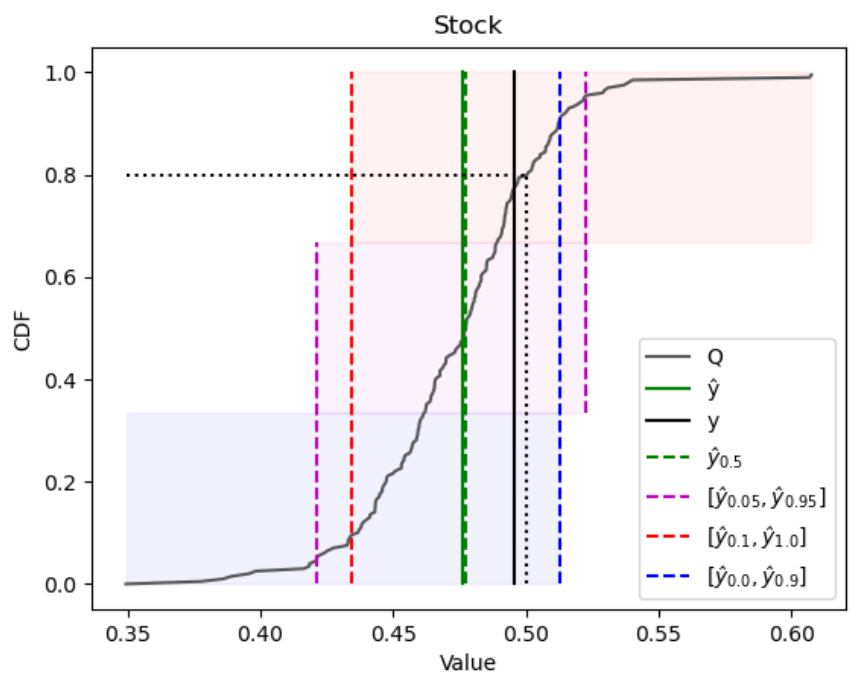
**Fig. 1**: 90% 신뢰도를 나타내는 세 가지 다른 구간을 보이는 CPD가 정의되었다. <span style="color:red">**하한 구간**</span>: 10분위 구간 초과; <span style="color:violet">**양측 구간**</span>: 5분위수와 95분위수 사이; <span style="color:blue">**상한 구간**</span>: 90분위수 미만. 검은 점선은 실제 타겟이 0.5보다 작을 확률을 어떻게 결정해야 하는지 알려주며, 여기서는 약 80%를 가리킨다.

그림 1은 CPD가 어떻게 단측과 양측 신뢰도 구간을 만드는지 설명하고 있다. 또한 실제 값이 임계값보다 아래로 떨어질 확률을 어떻게 구하는지도 보여준다. 또는 역으로 어떤 임계값이 특정 확률에 해당하는지를 보여준다.

똑같이 모델로부터 검증 신뢰 구간을 제공하는 CR과 비교하여 CPS는 CPD를 쿼리함으로써 구간과 확률을 정의하는 더 좋은 기회를 제공한다.

어려운 정도($\sigma$)를 추정하는 몇 가지 방법이 있다:
- k 근접 이웃들의 (유클리드) 거리
- k 근접 이웃들의 타겟의 표준편차
- k 근접 이웃들의 절대 오차
- 모델이 앙상블인 경우, 구성하고 있는 모델들의 예측값들의 분산

## Factual and Counterfactual Explanations for Regression (CER and CCER)
CER을 얻기 위해, VA로 얻은 확률 구간 $\left[ \mathcal{P}_l, \mathcal{P}_h \right]$와 보정된 확률 추정치 $\mathcal{P}$는 CPD로부터 얻어낸 신뢰 구간과 중앙값으로 교체된다. 신뢰 구간은 사용자가 선택한 하한과 상한 분위수로 정의되며 임의의 신뢰 구간이 동적으로 선택될 수 있도록 한다.

그로 인해 분류와 같은 방법으로 사실적, 반사실적 규칙을 만들어내기 위한 알고리즘을 위해서는, 2.4.2 (Factual Explanations for Classification)에서 설명된 알고리즘으로 조정을 해야만 하는 내용에서 보정기를 VA에서 CPS로 교체하는 것만 있으면 된다. CPS의 신뢰 구간은 유저가 부여한 분위수에 기초하므로 하한과 상한 분위수가 추가적으로 필요한 파라미터다. 기본값으로 하한과 상한 분위수는 \[5분위수, 95분위수\]로 CPD에서 양측 90% 신뢰 구간을 얻을 수 있다. 단측 구간은 실제로 사용할 때는 $-\infty$와 $\infty$가 하한과 상한 분위수로 할당된 양측 구간으로 처리된다. 분류에 사용된 보정된 확률 추정치는 CPD로부터 얻은 중앙값으로 교체되는데, 기본 모델의 보정을 나타내며 모델의 어떠한 체계적 편향을 중화시킨다. 결과적으로 CPS를 효과적으로 사용하는 것은 CER이 모델로부터 얻은 예측과 각 피처 규칙의 불확실성을 정량화할 수 있게 해준다.

더 공식적으로, 신뢰 구간과 중앙값은 다음과 같이 구할 수 있다:

1. 보정 잔차(calibration residuals)를 계산하기 위해 보정 셋을 사용한다.
    - $r_i=y_i-h(x_i), i \in \{1,...,l\}$
2. 잔차를 사용하여 `ConformalPredictiveSystem` 모델인 $cps$를 적합한다.
3. 50분위수, 하한 $\mathcal{P}^{th}_l$분위수, 상한 $\mathcal{P}^{th}_h$분위수를 이용해 중앙값과 구간값을 얻는다.
    - $[ m_{n+1}, l_{n+1}, h_{n+1} ] = cps(h(x_{n+1}), \mathsf{percentiles}=[50^{th}, \mathcal{P}^{th}_l, \mathcal{P}^{th}_h ])$
4. 2.4.2에서 설명된 절차대로 CER를 만들기 위해 VA 보정기로 얻은 $\mathcal{P}$와 $[\mathcal{P}_l, \mathcal{P}_h]$를 CPS로 얻은 $m_{n+1}$과 $[l_{n+1}, h_{n+1}]$로 대체한다.
5. 피처가 양의 가중치를 갖는 것이 예측에 양의 기여를 한 것처럼, 가중치가 회귀에 자연스러운 해석이 되게끔 등식 (1)-(3)은 아래처럼 변환된다.

    $w^f = \left( \frac{1}{|V_f|-1}\sum\limits_{\forall f_v \setminus f_v'} {\mathcal{P^{f_v}}} \right) - m_{n+1}$ (7)
    
    $w^f_l = \left( \frac{1}{|V_f|-1}\sum\limits_{\forall f_v \setminus f_v'} {\mathcal{P^{f_v}_l}} \right) - m_{n+1}$ (8)
    
    $w^f_h = \left( \frac{1}{|V_f|-1}\sum\limits_{\forall f_v \setminus f_v'} {\mathcal{P^{f_v}_h}} \right) - m_{n+1}$ (9)
    
    
CER에 넣는 값이 확률 추정치가 아닌 실제 값이라는 CEC와 다른 사실 때문에 CER은 피처 가중치가 확률 변화 대신 예측 변화를 나타내게 됐다는 것을 아는 것이 중요하다.

난이도 추정기를 사용하여 정규화된 CPDs를 기반으로 설명을 얻는 경우, $\sigma$는 `crepes.extras`의 `DifficultyEstimator`로 계산되며 중앙값과 구간값을 적합하고 얻을 때 모두 $cps$로 전달된다.

분류와 회귀의 사소한 차이점은 사용하는 이산기와 연관되어 있다. 분류 셋에서 `BinaryEntropyDiscretizer`와 `EntropyDiscretizer`가 범주형 타겟 값에 필요했다면, 회귀에서는 `BinaryDiscretizer`와 `DecileDiscretizer`가 추천된다. 이는 문제의 종류와 뽑아낼 설명에 따라 자동으로 결정된다.

## Factual and Counterfactual Probabilistic Calibrated Explanations for Regression (PCER and CPCER)
타겟 값이 임계값보다 아래 혹은 위에 있는지에 대한 확률을 예측하는 가장 쉬운 접근법은 문제를 타겟을 아래로 새로 정의하는 이진 분류 문제로 바꾸는 것이다.

$\dot y_i = \begin{cases} 1 & \text{if } y_i \le t \\ 0 & \text{if } y_i > t \end{cases}$ (10), $y$는 회귀 타겟, $t$는 임계값, $\dot y$는 이진 분류 타겟.

확률을 얻기 위해 몇 가지 형태의 확률 분류기가 사용된다. 임계값에 관심이 있는지, 혹은 각 테스트 사례가 맥락적 정보에 근거한 동적 임계값을 필요로 하는지에 따라 접근법이 달라진다.

CPS를 사용하면 타겟이 특정 임계값 아래로 떨어질 확률에 대해 어떠한 일반적인 회귀 모델을 쿼리할 수 있다. 따라서 문제를 분류 문제로 취급할 필요가 없다.

이 강점을 활용하여 설명을 만드는 것은 관심 있는 것이 확률 뿐일 때는 간단하다. 그러나 이 시나리오에서 불확실성을 정량화한 보정된 설명을 얻는 것은 분류 또는 회귀에 대한 사실적, 반사실적 설명을 만드는 것만큼 간단하지 않다. 분류에서 VA에 의해 생성된 확률 구간이나 회귀에서 CPS에 의해 도출된 신뢰 구간과 명백하게 동치인 것은 없다.

회귀에서 확률 문제가 분류 문제로 바라보는 것으로 달성될 수 있다는 사실이 해결법을 쥐고 있는 열쇠이다. VA는 보정과 테스트 사례 양쪽에 점수 $s$를 필요로 한다. 보정과 테스트 사례 양쪽에 확률 점수를 계산하는 함수로 CPS를 사용함으로써, 확률을 보정하고 확률 구간을 제공하도록 VA를 사용하는 게 가능해진다. 사용된 점수는 보정과 테스트 사례가 주어진 임계값보다 클 (CPD로부터 온) 확률이다. VA를 사용한 등방성 회귀 모델 역시 보정 셋에 대해 이진 타겟을 필요로 하는데, (10)에서 정의된 등식을 사용한다.

CPS가 보정 셋을 사용하도록 정의되었기 때문에, 같은 보정 셋에서 달성한 확률은 편향되어 있을 것이고 결과적으로 전혀 믿지 못하게 된다. 그를 보완하기 위해 각 보정 사례에 대한 확률은 다른 모든 보정 사례들과 함께 정의된 CPS로 달성된다. 더 공식적으로, 점수는 다음과 같이 얻는다:

1. 보정 잔차 $R=\{r_1,...,r_l\}$을 계산하기 위해 보정 셋을 사용하며, $r_i=y_i-h(x_i),i\in \{1,...,l\}$
2. 잔차 $R$을 이용하여 `ConformalPredictiveSystem` 모델인 $cps$를 적합한다.
3. 테스트 사례 $x_{n+1}$에 대한 점수 $s_{n+1}=cps(x_{n+1}, \mathsf{threshold}=t)$를 정의한다.
4. 각 보정 사례 $x_i$에 대해 ($i \in \{1,...,l\}$)
    1. 잔차 $R_{\setminus i}$를 사용한다. 즉, 사례 $i$를 제외한 모든 보정 사례의 잔차를 사용해 `ConformalPredictiveSystem` 모델인 $cps_{\setminus i}$를 적합한다.
    2. $y_i \le t$를 나타내는 확률인 점수 $s_i=cps_{\setminus i} (x_i,t)$를 계산한다.
    3. $\dot y_i=y_i \le t$를 보정 사례 $x_i$에 대한 범주형 타겟을 나타내는 것이라고 한다.
5. VA 보정기를 정의하기 위해 점수로써 $s$와 타겟으로써 $\dot y$를 사용한다. VA 보정기를 써서 $y_{n+1} \le t$에 대한 확률 구간 $[ \mathcal{P}_l, \mathcal{P}_h ]$와 보정된 확률 추정치 $\mathcal{P}$를 만들어내고 2.4.2의 설명을 사용하여 보정된 설명을 만들어낸다.

위에서 설명한 해결법이 선호되는데 이유는 보정 셋에 대한 점수를 계산할 때 편향을 피하기 때문이다. 그러나 계산 비용이 매우 비싸다. 훨씬 빠르지만 다소 편향된 해결법은 동일한 $cps$를 사용하여 보정 및 테스트 사례 모두에 대해 점수를 얻는 것이다. 이 해결법은 합리적인 계산 퍼포먼스를 달성하기 위한 정규화된 PCER과 CPCER을 위해 사용된다.

CER과 CCER에서 사용된 동일한 `discretizer`가 PCER과 CPCER에도 적용될 필요가 있는데 문제 종류에 따라 동기가 부여되기 때문이다. 나아가 만약 정규화된 CPS가 사용되면 $\sigma$는 `crepes.extras`의 `DifficultyEstimator`로 계산되며 확률 점수를 적합하고 얻을 때 모두 $cps$와 $cps_{\setminus i}$로 전달된다.

## Summary of Calibrated Explanations
두 가지 해결법이 제안되었는데, Calibrated Explanations는 여러 가지 가능한 용례를 제공한다(Table 1). 조건이 있는 피처 규칙 목록과 피처 가중치 또는 신뢰 구간이 있는 특징 예측 추정치(2.4에서 설명된 대로)로 구성된 사실 및 반사실적 설명의 일반적인 구조는 다음과 같다.

| Explanation         |    Characteristics   | Classification |    Regression   | Probabilistic<br>Regression |
|---------------------|:--------------------:|:--------------:|:---------------:|:------------------------:|
| Regular Factual     |  Only prediction CI  |       TI       | 5TI + 5LI + 5UI |            5TI           |
| Uncertainty Factual | Rule + prediction CI |       TI       |       5TI       |            5TI           |
| Counterfactual      |     Only rule CI     |       TI       | 5TI + 5LI + 5UI |            5TI           |

**Table 1**: CE를 이용한 가능한 방법들의 요약. CI는 신뢰 구간, TI는 양측 구간, LI는 하한 단측 구간, UI는 상한 단측 구간을 의미하며 계수 5는 정규화를 사용하는 방식들을 의미한다. (정규화 없음 + 3.2에서 설명한 네 종류의 정규화 리스트)

## Quality of Calibrated Explanations for Regression
보정 데이터에 기반한 CPD로부터 온 중앙값은 모델 예측의 보정 형태로 보이는데, 테스트 사례를 이전에 보정 셋에 표시된 것과 일치하도록 예측값을 조정했기 때문일 것이다. 보정은 주로 모델의 시스템적 편향에 영향을 미친다. 결과적으로 CE는 모델을 보정하기 때문에 보정된 예측과 설명을 만들어낸다. 게다가 VA는 모델로부터 확률 추정치와 PCER을 위한 구간을 통한 피처 중요도 가중치의 불확실성 정량화를 제공한다. 범주형 피처의 동일 규칙과 수치형 변수의 이진 분류법을 사용함으로써 타겟과 사례 값이 연관되어 대응하는 피처 가중치로 규칙의 의미를 해석하는 것은 직관적이고 모호하지 않으며 분류와 같은 로직을 따른다.

보정된 결과물과 (CER과 PCER을 위한) 피처 가중치 또는 (CCER과 CPCER을 위한) 피처 예측 추정치 사이의 관계성을 직관적으로 정의한 규칙 때문에 설명은 믿을 수 있다. 설명은 견고하여 피처 규칙이 커버하는 한 피처 값에 혼란이 있어도 유지된다. 예측의 변형, 예를 들어 다른 훈련 셋으로 학습할 때, 그것은 예측값이 바뀜에 따라 피처 규칙의 변형을 초래한다. 명백히 이 방법은 피처 규칙 조건을 위반하는 혼란에 대한 견고성은 보장하지 않는다. CER과 CCER 설명법은 같은 보정 셋과 모델이 사용되는 한 유지된다. 마지막으로, CPS를 정의하는 데 사용되는 보정 셋의 크기에 달렸지만, 대부분의 경우 CER 생성은 `LIME`과 `SHAP`과 같은 기존 해결책보다 빠르거나 적어도 비슷한 수준이다. PCER을 만드는 것은 CEC보다 느린데 VA가 학습되길 요하기 때문이다. CEC와 비교하여 PCER은 각 보정 사례에서 CPS를 사용함에 따라 약간의 추가 오버헤드가 발생한다.

마지막으로, 사실적 CE의 필수요소인 보정된 예측과 신뢰 구간은 보정 모델이 사용됨에 따라 동일한 보장을 준다. 즉 분류의 경우 VA, 회귀(또는 확률 회귀 둘 다)의 경우 CPS와 동일한 보장을 한다. 그러나 피처 규칙에 대한 구간 형태의 불확실성 정량화가 동일한 보정 모델에서 도출된 경우라 하더라도 피처 규칙 구간이 반드시 동일한 보장을 제공하지는 않는다. 그 이유는 2.4.2의 스텝 2에서 사용된 교란 사례가 인위적이고 피처 값의 조합이라 문제 도메인에 항상 자연적으로 발생하지 않기 때문이다. 이런 상황이 발생할 때마다 모델과 보정 모델은 이상한 사례임을 표시하지만 데이터에 정확한 추정의 근거가 되는 증거가 없기 때문에 이상한 정도를 올바르게 추정하지 못할 수 있다.

# Method
회귀와 확률 회귀 모두 파이썬 패키지 `calibrated-explanations`에 들어있고 `crepes` 패키지의 `ConformalPredictiveSystem`에 의존한다. 기본값으로 `ConformalPredictiveSystem`은 정규화를 제외하고 사용하지만 `crepes.extras`의 `DifficultyEstimator`는 정규화 옵션에 대응하는 리스트를 `calibrated-explanations`에 지원한다.

## Presentation of Calibrated Explanations trough Plots
CE를 위한 세 종류 플롯이 제공된다. 처음 두 개는 CER를 시각화할 때 사용된다. 이는 `LIME`에 영감을 받았고 특히 `LIME`의 규칙이 설명에서 중요한 정보를 제공하는 것으로 보여졌다.
- 정규적인 설명, 불확실성 정보 없이 CE 제공. 이 설명법은 `LIME`처럼 다른 피처 중요도를 직접적으로 비교하는 기법이다.
- 불확실성 설명, 불확실성 구간을 포함한 CE를 제공하여 피처 중요도와 추정 중요도와 관련된 불확실성의 양을 강조한다.
앞선 절에서 이유를 들었듯, CE는 (`LIME`에 쓰이는 모든 이산기 역시 CE에 쓰일 수 있음에도) 사실적 설명과 함께 이진 규칙을 사용하기 위한 것이다. CE에서 주목할만한 한 가지 측면은 피처 가중치가 각 피처가 개별적으로 결과에 어떤 영향을 미치는지만 표시한다는 점이다. (둘 혹은 세 개의 규칙을 섞어 만든) 피처 조합을 통해 쌍으로 결합된 가중치도 볼 수 있다. 피처 가중치가 `SHAP`처럼 기여도 기반 설명을 하고 있지는 않다는 점을 명확히 해야한다.

세 번째 종류의 플롯은 대체 피처 값을 사용할 때 각 피처에 대한 예비 예측 추정치(preliminary prediction estimates)를 보여주는 반사실적 플롯이다.

피처 규칙은 항상 가장 영향이 큰 규칙부터 시작하는 피처 가중치 순으로 정렬되어 있다. CE 설명에 대한 플롯을 그릴 때 사용자는 보여줄 규칙의 갯수를 정할 수 있다. 사실적 설명은 각 피처에 한 개의 규칙을 가진다. 반사실적 설명은 CE가 가능한 많은 반사실적 규칙을 만들면 훨씬 많은 수의 규칙을 보여줄 수 있으며 특히 많은 값을 가지는 범주형 변수의 경우가 그렇다.

내부적으로 CE는 분류와 회귀 모두에서 같은 표현을 사용한다. 그러나 설명을 시각화한 도표는 CER과 PCER에 맞게 조정되었다.

### Calibrated Explanations Plots
분류처럼 회귀도 같은 종류의 플롯이 존재한다. 분류에 사용된 플롯과 비교하면 회귀에 사용된 플롯은 두 가지가 필수적으로 다르다.

CER과 CCER의 공통된 차이점은 피처 가중치가 실제 타겟 값의 변화를 나타낸다는 것이다. CER에서는 피처 중요도가 +100이 뜻하는 것은 실제 피처 값이 예측에 +100의 영향을 주었다는 것이다. CCER에서는 불확실성 구간을 포함한 예측 추정치를 보여주면서 반사실적 조건이 충족됐을 때 예측이 어떻게 추정되는지를 보여준다.

사실적 플롯에만 적용된 차이점은 플롯의 위에 다른 클래스들에 대한 확률을 내놓는 것과 대신에 중앙값 $m$과 신뢰 구간 $[l,h]$를 예측값으로써 보여준다는 것이다.

### Probabilistic Calibrated Explanations Plots
CEC처럼 PCER은 확률로써 피처 중요도를 나타낸다. 분류와 비교하여 PCER에 대한 플롯을 그릴 때의 유일한 차이점은 클래스 라벨에 대한 확률이 주어진 임계값보다 아래($\mathcal{P}(y\le t)$)이거나 위($\mathcal{P}(y>t)$)에 대한 확률을 보여주는 것으로 바뀐 것밖에 없다.

## Experimental Setup
CER, CCER, PCER과 CPCER에 대한 소개와 성능을 평가한다. 모든 플롯은 California Housing 데이터셋으로 그려졌다. 모든 실험의 모델은 `sklearn`의 `RandomForestRegressor`를 사용했다.

제안하는 알고리즘은 빠르고, 믿을 수 있고, 안정적이고 견고하다고 주장한다. 이러한 주장은 성능 평가에서 검증을 요구한다. 설명은 불확실성 추정치의 검증 때문에 믿을 수 있다. 즉, 결과는 CPD를 쿼리하여 얻어졌고 피처 가중치 혹은 피처 예측 추정치의 불확실성을 정량화한 것에서 왔다. 속도, 안정성과 견고성은 California Housing 데이터의 고정된 테스트 사례 셋을 사용한 실험으로 평가했다. 각 실험은 검증 셋으로써 500개의 사례들과 10개의 테스트 사례들을 사용해 100번 반복했다. 타겟 값은 정규화되어 $y \in [0, 1]$이다. 다음 셋업들이 평가되었다:
- CER: 정규화 없이 사실적 설명
- CER Var.: 랜덤 포레스트 회귀 모델 구성 모델들의 예측값의 분산에 기초한 정규화
- CCER: 정규화 없이 반사실적 설명
- PCER: 정규화 없이 확률적 사실 설명. 임계값은 모든 사례에 대해 0.5이며, 가능한 타겟 값의 구간의 중앙점이다.
- LIME: LIME 설명.
- LIME CPS: 예측으로써 CPD로 얻은 중앙값을 사용한 LIME 설명. CPS는 랜덤 포레스트 회귀 모델에 기초한다.
- Tree SHAP: SHAP 설명. `TreeExplainer` 클래스가 사용되었으며 C++로 구현되어있고 랜덤 포레스트 같은 트리 기반 모델에 최적화되어있다.
- SHAP CPS: 예측으로써 CPD로 얻은 중앙값을 사용한 SHAP 설명. CPS는 랜덤 포레스트 회귀 모델에 기초한다. 여기서는 `Explainer` 클래스가 사용되었다.

평가 지표는 다음고 같다:
- *안정성(Stability)* 는 동일한 사례와 모델에 여러 번 작업하면 항상 같은 결과가 나와야 함을 의미한다. 안정성은 100개의 서로 다른 랜덤 시드로 같은 예측 사례에 대한 설명을 생성하는 것으로 평가했다. 피처 가중치(또는 피처 예측 추정치)의 가장 큰 분산은 가장 중요한 피처라고 하였다. 각 테스트 사례의 탑 피처는 100번 중 가장 많이 가장 중요하다고 뽑힌 것으로 식별되었다 (즉 절대 피처 가중치로 정의된 피처 랭크의 최빈값). 탑 피처의 분산은 100번 이상의 실행으로 측정되었고 테스트 사례의 평균 분산이 보고되었다.
- *견고성(Robustness)* 는 사례의 작은 변동이 설명에서 큰 변화를 일으키지 않는 것을 의미한다. 견고성은 안정성과 비슷하게 측정되었으나 훈련 및 보정 셋이 무작위로 추출되고 각 실행에 대해 새로운 모델이 적용되므로 인위적인 사례를 구성할 필요 없이 동일한 사례에 대한 예측에 자연스러운 변화가 생긴다. 다시 한번 탑 피처의 분산이 견고성을 측정하는데 사용되었다. 각 실행이 새로운 모델과 보정 셋을 이용했다는 것과 모든 실험에서 랜덤 시드를 42로 고정했다는 점을 제외하면 안정성 셋업과 같다.
- *계산 속도(Computational speed)* 는 설명을 만들어내는 시간을 비교하였다 (각 사례당 초). 측정된 것은 메서드 호출에 대한 설명뿐이었다. explainer 클래스를 시작할 때 생기는 어떠한 오버헤드는 고려되지 않았다. PCER과 가장 비슷한 것들이 3.4에서 설명했듯 분류에서의 LIME과 SHAP에 적용되었다. VA는 비교적 느리고 PCER은 CPSs와 VA의 조합이기 때문에 각 보정 사례에 CPS를 적합하고 호출하는 것은 느릴 수 있다.

# Results
결과는 두 파트로 나눠진다: 1) 플롯을 이용한 CE 설명, CE를 사용하고 볼 수 있는 다양한 방법을 설명하고 보여준다. 2) LIME과 SHAP과 비교한 성능 평가

## Presentation of Calibrated Explanations through Plots
아래에서는 회귀에 대한 CE의 기초적 예제 몇 가지를 보여준다. 먼저 회귀에 대한 사실적, 반사실적 설명이 보여지고 다음으로 확률적 회귀에 대한 사실적, 반사실적 설명을 보여준다.

### Factual Calibrated Explanations for Regression

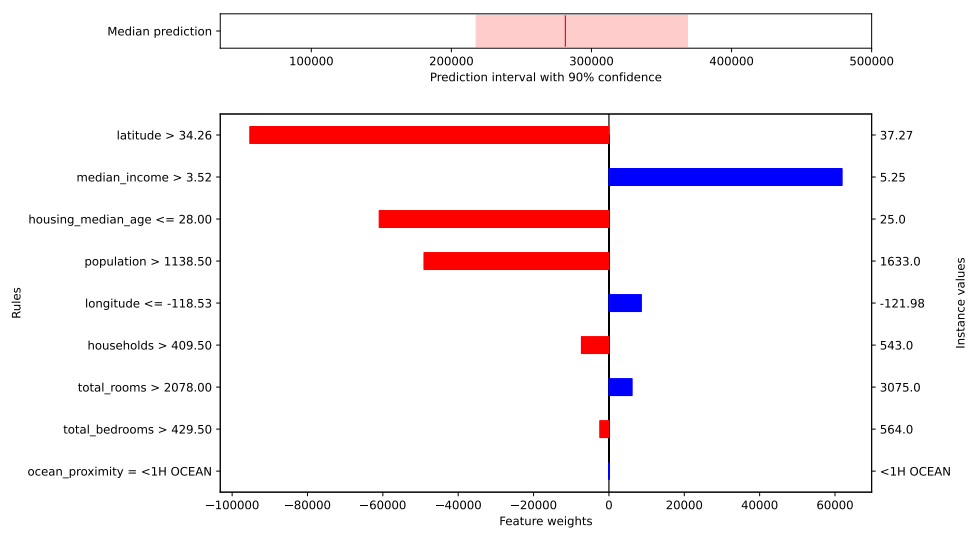
**Fig. 2**: California Housing 데이터셋에 대한 정규 CER 플롯. 위의 바는 중앙값(빨간선)과 신뢰 구간(연한 빨간 영역)을 나타내며 5분위수와 95분위수로 정의된 것이다. 아래 플롯은 각 피처의 가중치를 보여준다. 가중치는 예측에 규칙이 얼마나 기여했는지를 나타낸다. 음의 가중치는 예측에 음의 영향을 미쳤다는 것이고 양의 가중치는 양의 영향을 준 것을 의미한다.

Fig. 2의 정규 CER 플롯은 위의 바에서 빨간선으로 보정된 예측값을 보여주는 것과 함께 연한 빨간 영역으로 90% 신뢰 구간을 보여준다. 보이듯이 집값은 90%의 신뢰도로 $\approx \$285 \text{K}$로 예측되며 $[\$215\text{K}-\$ 370 \text{K}]$ 사이에 있을 것으로 예상된다. 피처 규칙으로 돌아가서, 검은 선은 위 바의 중앙값을 나타낸다. 규칙 조건은 왼쪽에 보여지고 실제 사례 값은 오른쪽에 적혀있다. 집이 북쪽에 위치하고 있다는 사실(`latitude > 34.26`) 때문에 집값에 음의 영향을 미쳤다 ($\approx \$95 \text{K}$ 감소). 반면 *median income* 은 꽤나 큰 값이기 때문에 (`median_income > 3.52`) 약 $\$60\text{K}$를 위로 올렸다. `Housing median age`와 `population`은 확실히 집값에 음의 영향을 미친 피처이다.

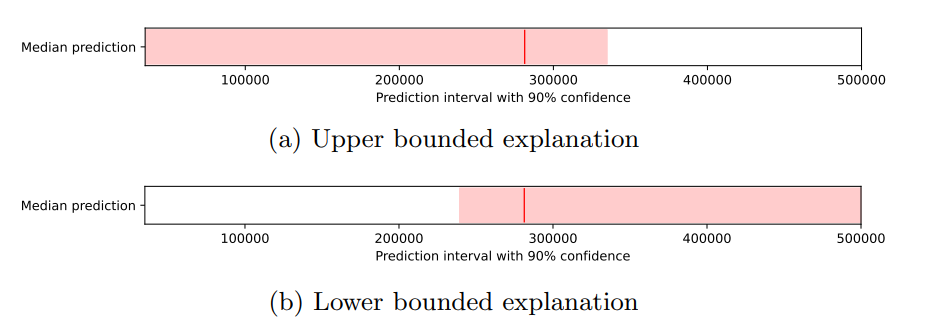
**Fig. 3**: 위(Fig. 3a)는 90분위수로 가두어진 단측 신뢰 구간, 아래(Fig. 3b)는 10분위수로 가두어진 단측 신뢰 구간 CER 플롯. 빨간선은 중앙값을 나타낸다. 가중치는 Fig. 2의 설명과 같다.

단측 구간이 사용되었을 때 정규 CER 플롯은 위 바만 영향을 받는다. 그림 3a와 3b는 동일한 사례에 동일한 피처 규칙을 뱉으면서 상한과 하한 설명을 보여주고 있다. 볼 수 있듯 중앙값(빨간선)은 이전과 같고 신뢰 구간이 한 쪽 끝까지 뻗은 모습을 볼 수 있다. Fig. 2의 양측 CER 플롯과 비교하면 상한(Fig. 3a의 $\approx \$330 \text{K}$)은 더 낮고 하한(Fig. 3b의 $\approx \$240 \text{K}$)은 더 높다.

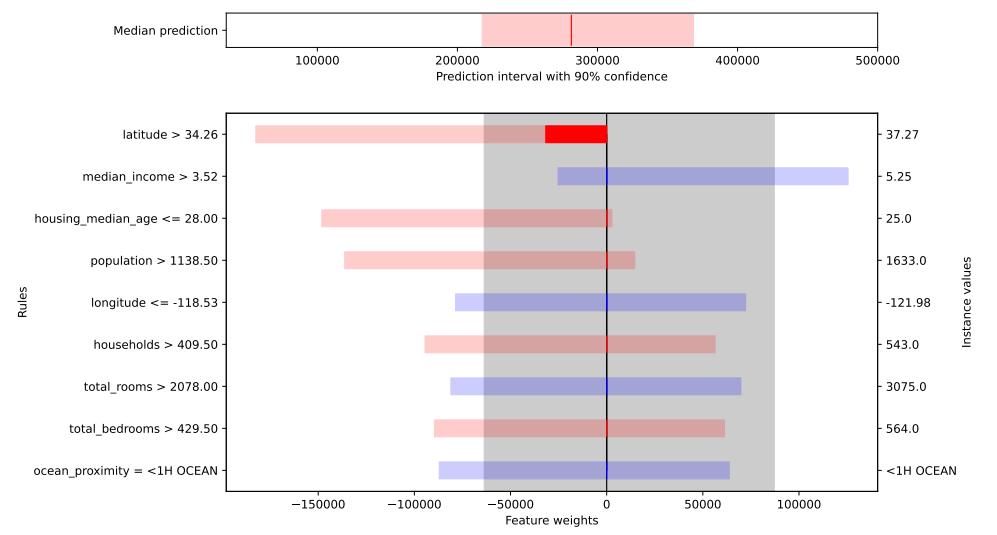
**Fig. 4**: California Housing 데이터셋에 대한 불확실성 CER 플롯. 위 바는 중앙값과 $[5^{th}, 95^{th}]$ 분위수 신뢰 구간을 보여주는 Fig. 2와 동일하다. 아래에서는 $[5^{th}, 95^{th}]$ 분위수 신뢰 구간을 이용하여 가중치의 불확실성을 연한 빨강과 연한 파랑으로 표시하고 있다. 가중치는 여전히 규칙이 예측에 얼마나 기여했는지를 나타내지만 신뢰 구간은 피처 값과 규칙이 결합된 영향에 대한 불확실성의 범위를 강조한다.

Fig. 4는 이전과 같은 사례에 대한 불확실성 플롯이다. CER 플롯에서 불확실성 정량화를 포함하면 피처 중요도는 신뢰도를 사용하여 가능한 기여도 범위를 연하게 색칠된 구역으로 보여진다. 검은 선을 감싸고 있는 회색 영역은 위 바와 동일한 신뢰 구간을 나타낸다. 보이듯이 북쪽 *위치* 는 여전히 큰 음의 영향을 주지만 영향이 정확히 얼마나 큰지에 대한 불확실성의 범위는 약 $\$150 \text{K}$으로 대략 $[-\$180\text{K}, - \$ 30 \text{K}]$ 구간에 속한다. 선의 일부가 단색으로 표시된 것은 선택한 신뢰 수준을 고려할 때 이 피처가 적어도 $-\$30\text{K}$ 영향을 미칠 것으로 예상할 수 있음을 나타낸다.

다른 피처들을 살펴보면, 모든 피처의 불확실성 구간이 중앙값을 포함하는 것을 볼 수 있는데, 이는 90\% 신뢰도로 이 피처들이 집값에 같은 방향으로 영향을 주었다고 할 수 있음을 의미한다. *median income* 과 특히 *housing median age* 는 각각 양과 음의 영향을 미칠 가능성이 더 높다. 이 예제에서는 정규화가 되지 않았기 때문에 모든 구간들은 비슷한 너비를 가진다.

### Counterfactual Calibrated Explanations for Regression
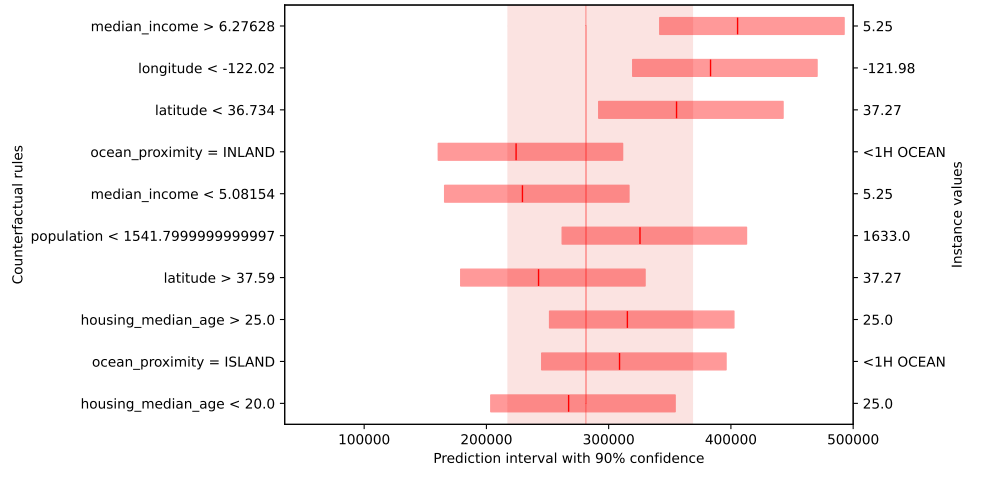
<center><b>Fig. 5</b>: California Housing 데이터셋에 대한 CCER 플롯. 배경의 가장 연한 빨간 영역은 5분위수와 95분위수로 정의된 신뢰 구간이다. 각 행은 반사실적 규칙을 나타내며, 진한 빨간색으로 표시된 구간은 규칙 조건에 따른 위반이 어떤 신뢰도 구간을 초래할 수 있는지를 나타낸다. 반사실적 규칙에 대한 신뢰 구간 역시 5분위수와 95분위수로 정의된다. 실선은 중앙값을 나타낸다.</center>

Fig. 5는 이전과 같은 사례에 대해 CCER 플롯을 보여준다. 실선과 그 뒤쪽의 매우 연한 영역은 모델의 보정된 예측값의 중앙값과 신뢰 구간을 나타낸다 (즉 Fig. 2와 같다). 이는 모든 반사실적 피처 규칙과 대조해야하는 ground truth이다.

CER과 대조적으로 CCER 플롯에서는 모든 규칙이 사례 값을 갖고 있지 않는다. 대신에 동일한 피처가 여러 규칙에 존재하는 몇 가지 예가 있다. 여기서 각 규칙에 대한 실선과 연한 빨간색 바는 사례가 규칙에 따라 값을 가졌을 경우 얻을 수 있는 예상 중앙값 및 신뢰 구간이라는 해석이다. 예를 들면, 나머지가 동일하지만 `median income > 6.28`이 되면 신뢰 구간 $[\$340\text{K},\$490\text{K}]$와 기대 집값 $\approx \$405\text{K}$를 가졌을 것이다. 만약 집 위치가 좀 더 남쪽(`latitude < 36.7`)이었다면 가격은 올랐을 것이고 더 북쪽(`latitude > 37.6`)에 있으면 집값이 낮아질 것이라는 건 명백하다.

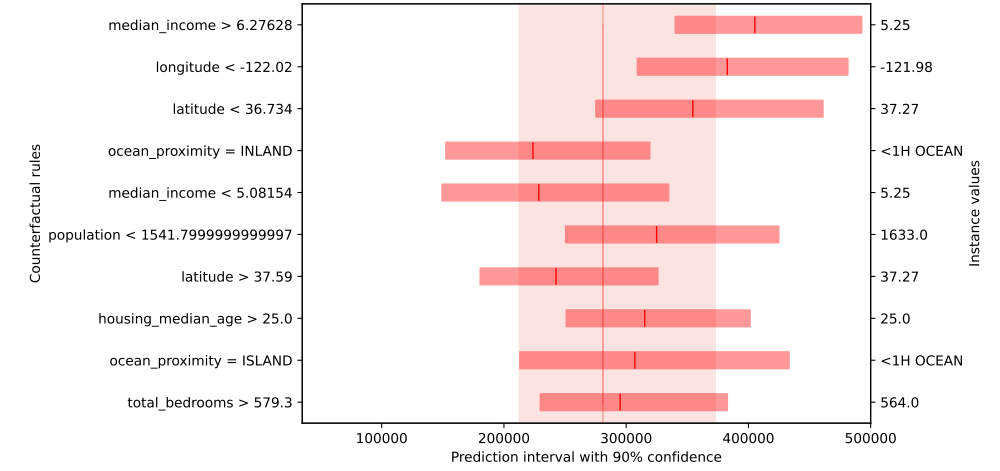
<center><b>Fig. 6</b>: 정규화된 CCER 플롯으로 Fig 5와 비교하면 정규화의 결과로 다양한 구간 너비를 갖는 규칙이 생성된다. 어려운 정도는 k 근접 이웃의 타겟의 표준 편차로 추정되었다.</center>

지금까지의 모든 예제에서는 표준 CPS를 사용하여 설명(CER 및 CCER 모두)을 구성했으며 그 결과 모든 신뢰 구간이 거의 동일한 크기로 나타났다. Fig. 6에서 k 근접 이웃의 타겟의 표준 편차에 기초한 어려운 정도 추정기가 사용되었다. 정규화는 모델의 보정과 사례와 피처 구간 사이에 다양한 크기를 갖는 신뢰 구간을 생성하도록 영향을 준다. 피처 구간의 폭에 대한 대략적인 가정은 보정 셋에 대체 피처 값을 포함하는 인스턴스가 더 적으면 정보가 적기 때문에 피처 간격이 더 커지는 경향이 있으며 그 반대의 경우도 마찬가지이다. 이 예제에서 어려운 정도는 근접 사례 목표 값의 표준 편차를 기준으로 정의되므로 이것이 모두 사실일 필요는 없다. Fig. 6에서 볼 수 있듯이 정규화된 CCER은 비정규화된 CCER보다 더 좁거나 넓은 신뢰 구간을 갖도록 규칙을 생성한다.

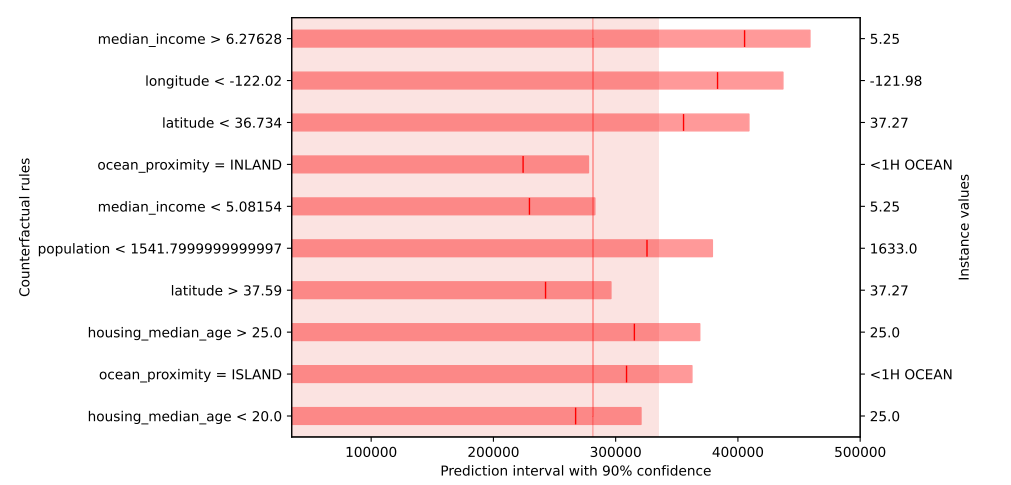
<center><b>Fig. 7</b>: California Housing 데이터셋에 대한 단측 CCER 플롯. 신뢰 구간은 90분위수만으로 정의되었다. 90\%의 확실성을 가지고 원래 사례의 실제 값은 가장 연한 빨간 영역에 들어올 것이라고 해석할 수 있다. 만약 반사실적 규칙이 개별 피처에 사실이 된다고 가정하면 실제 값은 약 90\%의 확실성을 가지고 진한 빨간 영역에 떨어질 것이다.</center>

CER과 비슷하게 CCER 역시 단측이 가능하다. Fig. 7은 90\% 신뢰도의 상한이 있는 설명을 보여준다. 첫번째 규칙의 해석은 이전처럼 다른 모든 것은 동일한 상태에서 `median income > 6.28`이 되면 90\%의 확실성을 가지고 집값이 $\approx \$450\text{K}$ 미만이 된다. 같은 CPS가 사용되었기 때문에 중앙값은 여전히 양측 설명과 동일하다.

### Factual Probabilistic Calibrated Explanations for Regression
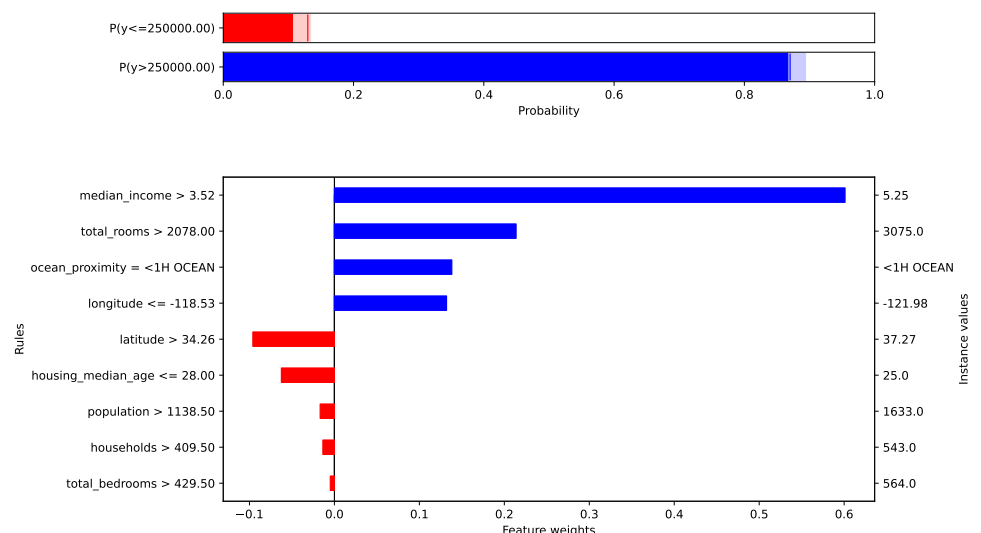
<center><b>Fig. 8</b>: California Housing 데이터셋에 대한 정규 PCER 플롯. 플롯은 이 사례의 예측값이 주어진 임계값($\$250\text{K}$)보다 클 확률을 보여준다. 설명은 임계값 미만/초과일 확률과 CPD로 얻은 확률을 보여준다는 차이 외엔 정규 CEC 플롯과 비슷하다.</center>

Fig. 8은 이전들과 동일한 사례에 대한 정규 PCER 플롯이다. 이 플롯에서는 주어진 임계값 미만/초과일 확률에 대한 CPD를 쿼리할 수 있는 가능성을 활용한다. 여기서는 임계값을 집값 $\$250\text{K}$로 잡았다. `median income > 3.52`가 타겟이 $\$250\text{K}$ 초과일 확률에 가장 큰 기여를 했다. 

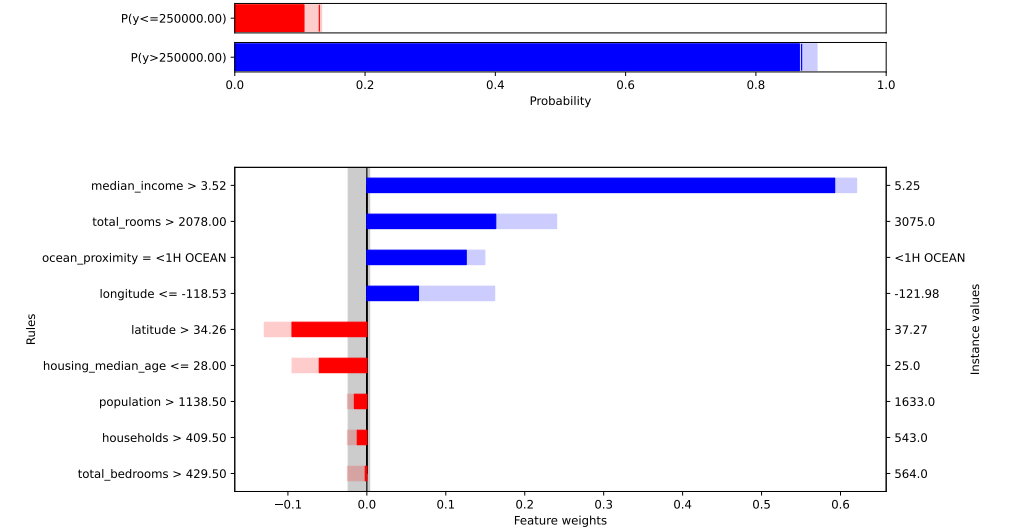
<center><b>Fig. 9</b>: Fig. 8과 같은 불확실성 PCER 설명. 플롯은 피처 가중치의 불확실성을 포함한다.</center>

Fig. 9에서는 같은 설명에 불확실성이 함께 들어있다. 볼 수 있듯이 피처 간 불확실성의 사이즈가 크게 다르고 이는 VA 보정기의 보정에 달려있다.

### Counterfactual Probabilistic Calibrated Explanations for Regression
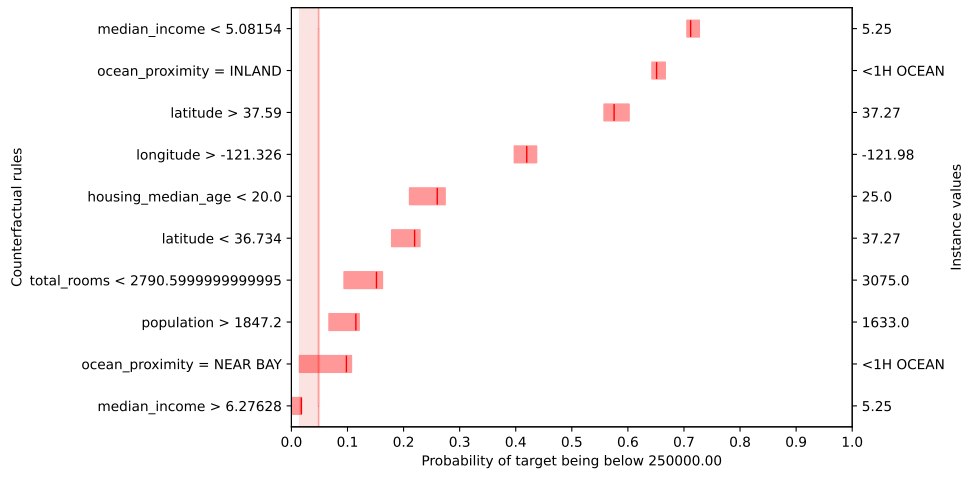
<center><b>Fig. 10</b>: 이전과 같은 사례에 대한 정규화된 CPCER 플롯</center>

Fig. 10은 같은 사례에 대한 정규화된 CPCER 플롯을 보여준다. 여기선 랜덤 포레스트의 나무들의 예측값의 분산을 기초로 정규화되었다. 가장 영향력 있는 규칙은 <i>median income</i>과 관련되어 있고 낮은 수익은 낮은 가격에 대한 확률을 증가시킨다.정규화는 피처 확률 추정치와 신뢰 구간에 영향을 미쳤고 결과적으로 규칙의 다른 순서 결과를 만들었다.

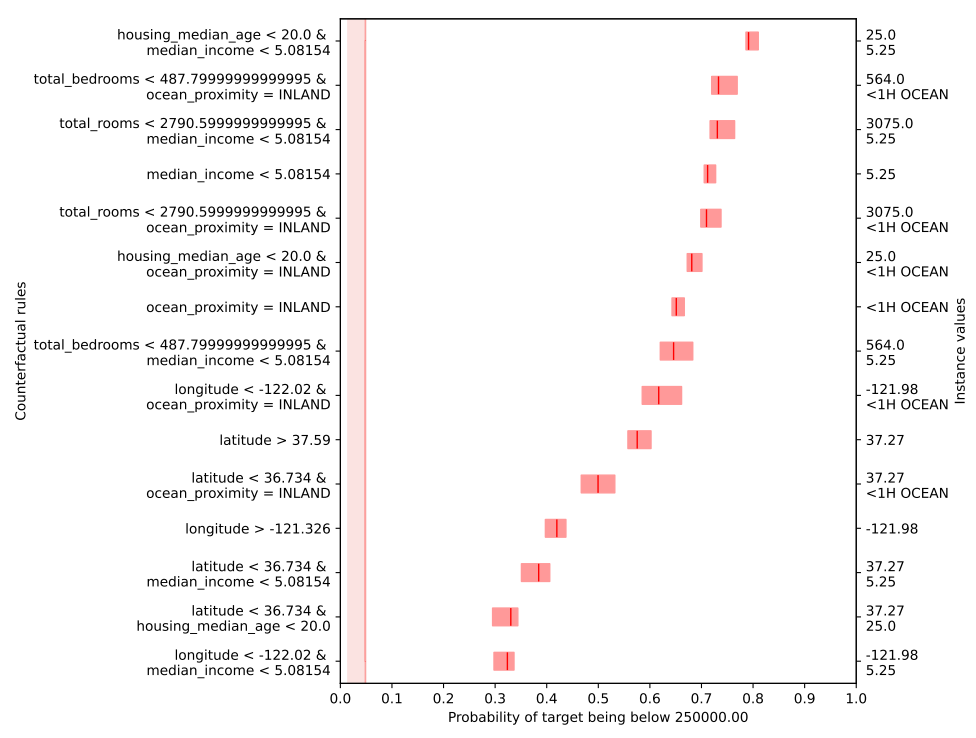
<center><b>Fig. 11</b>: 이전과 같은 사례에 대한 조합 규칙의 정규화된 CPCER 플롯</center>

Fig. 11의 마지막 예제는 하나의 규칙에 두 가지 피처 조건이 결합되어있는 조합 규칙과 랜덤 포레스트의 트리의 예측의 분산을 이용한 정규화를 보여주고 있다. 여기서 플롯되는 규칙의 숫자가 15개까지 늘어났다. 대부분의 규칙이 조합인 것을 보면 조합 규칙이 단일 조건 규칙보다 더 영향력 있는 규칙이 되는 경우가 많다는 것을 알 수 있다.

사실적 혹은 반사실적 규칙은 `crepes.extras`의 `DifficultEstimator`를 통해 정규화 없이 혹은 정규화 옵션을 사용하여 만들어낼 수 있다. 조합 규칙은 설명이 만들어지면 언제든 추가할 수 있다. 여기서 보여준 모든 예는 제안된 솔루션을 사용할 수 있는 방법의 일부라는 것을 보여주기 위해 동일한 사례와 동일한 모델에서 가져온 것이다. 더 많은 예제는 code repository에서 찾을 수 있다.

## Performance Evaluation
표 2는 안정성, 견고성 그리고 계산 속도에 대한 결과를 보여준다. 안정성은 다른 랜덤 시드를 사용하여 같은 사례에 설명을 만들 때의 평균 분산을 사용하여 측정했고, 낮은 값일수록 높은 안정성을 나타낸다. SHAP 셋업과 PCER을 제외한 모든 CE 셋업은 평균 분산이 0($1e-31$ 미만)이기 때문에 안정하다고 보여지는 것이 분명하다. 반면 LIME과 PCER은 무시할 수 없을만한 평균 분산을 가지고 있고 곧 비교적 덜 안정적임을 의미한다. PCER이 덜 안정적인 이유는 CPD로부터 얻을 수 있는 확률의 민감도와 관련이 있다. 민감도의 이유는 예측의 상대적으로 작은 변화가 임계값을 넘을 확률에 큰 변화를 줄 수 있고 특히 타겟이 임계값과 가까울 때 그렇다 (임계값이 0.5로 설정됐을 때, 즉 가능한 타겟 값 구간의 중앙값). CPD로부터 온 중앙값을 사용한 설명과 모델을 이용한 설명은 비슷한 안정성 수준을 보인다.

견고성을 측정하는 것은 안정성과 비슷한데, 각 실행마다 다른 훈련 분포와 보정 사례를 이용하여 새로운 모델을 학습시키는 점만이 다르다. 견고성에 대한 결과는 같은 사례에 대한 모델 예측의 분산과 관련해서 보아야 한다. 그 이유는 예측을 사용하여 피처 가중치가 정의되기 때문에, 설명의 기반이 되는 예측이 변동하면 피처 가중치도 그만큼의 변동을 예상할 수 있기 때문이다. 평균 예측 분산은 $4.7e-2$이다. 모든 CE 셋업이 LIME과 SHAP에 비교하면 비교적 큰 평균 분산을 갖고 있지만 (즉, 덜 견고하지만) 평균 예측 분산에 비하면 낮다. 더구나 CE 셋업으로 만들어진 설명은 평균 분산을 측정하는데 사용되는 선명한 피처 가중치에 의존할 뿐만 아니라 불확실성 구간을 포함하여 각 피처 가중치와 관련된 불확실성의 정도를 강조 표시한다.

| Metric     |   CER  | CER<br>Var. |  CCER  |  PCER  |  LIME  | LIME<br>CPS | Tree<br>SHAP | SHAP<br>CPS |
|------------|:------:|:-----------:|:------:|:------:|:------:|:-----------:|:------------:|:-----------:|
| Stability  |    0   |      0      |    0   | 1.9e-5 | 3.9e-5 |    3.2e-5   |       0      |      0      |
| Robustness | 4.2e-4 |    3.7e-4   | 1.9e-3 | 3.9e-3 | 8.2e-5 |    8.6e-5   |    1.4e-4    |    1.4e-4   |
| Speed      |  0.37  |     0.66    |  0.51  |  4.20  |  3.08  |     3.11    |     0.06     |     0.56    |

<b>Table 2</b>: 안정성, 견고성과 계산 속도에 대한 평가

계산 속도 관련하여서는 랜덤 포레스트 같은 트리 기반 모델을 적용했을 때 C++로 구현된 Tree SHAP(`TreeExplainer`)이 빠른 것은 놀랍지 않다. SHAP(`Explanier`)이 CPD의 중앙값을 적용했을 때보다 약 9배 빠르다. CER은 SHAP CPS보다 약간 빠르지만 Tree SHAP보다 확연히 느리다. CER은 한 사례당 평균 약 3초 걸린 LIME보다 8배 빨랐다. CER Var. (정규화한 것)은 어려운 정도를 측정하는 것이 계산을 요하기 때문에 CER보다 느릴 것이라고 예상됐다. 또한 CCER은 일반적으로 CER보다 많은 규칙을 만들어내기 때문인지 CER보다 약간 느렸다. 가장 느린 것은 PCER인데 모든 보정 사례에 대해 확률을 계산할 뿐만 아니라 각 테스트 사례에 대해 두 개의 등방 보정기를 학습해야하기 때문이다. (평가되지 않은) 정규화된 PCER은 각 보정 사례가 CPS에 적용되어야하기 때문에 매우 느리다는 점을 지적할 가치가 있다. 그러나 현재 구현된 것에서는 위에서 논의한 편향되어있으나 빠른 솔루션들이 정규화된 PCER과 CPCER 용도로 사용된다.

# Examples (with Codes)

## demo_regression
https://github.com/Moffran/calibrated_explanations/blob/main/notebooks/demo_regression.ipynb

### Import Packages, data and train an underlying model

#### Import packages
아래 예제에서는 `NumPy`, `pandas`, `sklearn` 그리고 `crepes`를 사용한다. `crepes`에서 `ConformalPredictiveSystem`을 임포트하고 `crepes.extras`에서 몇 가지 도우미 함수를 가져온다. `CalibratedExplainer`는 `calibrated_explanations`에서 임포트한다.

In [1]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from calibrated_explanations import CalibratedExplainer, __version__

from crepes import ConformalPredictiveSystem
from crepes.extras import DifficultyEstimator

print(f"calibrated_explanations {__version__}")

calibrated_explanations v0.1.1


#### Import data and train a model

In [4]:
dataSet = 'housing.csv'
delimiter = ','
categorical_labels = {'INLAND':0, 'NEAR BAY':1, '<1H OCEAN':2, 'NEAR OCEAN':3, 'ISLAND':4}

fileName = dataSet
df = pd.read_csv(fileName, delimiter=delimiter)
target = 'median_house_value'
df.dropna(inplace=True)
df.replace(categorical_labels, inplace=True)
df = df.astype(np.float64)
X, y = df.drop(target,axis=1), df[target] 
feature_names = df.drop(target,axis=1).columns
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1.0


훈련과 학습 데이터셋으로 나누고 훈련 셋을 적절 훈련 셋과 보정 셋으로 한 번 더 나눈다. 적정 훈련 셋으로 랜덤 포레스트를 적합시킨다. 재실행해도 같은 결과를 얻기 위해 랜덤 시드를 부여한다.

In [6]:
num_to_test = 1

trainCalX, testX, trainCalY, testY = train_test_split(X.values, y.values, test_size=num_to_test, random_state=42)
trainX, calX, trainY, calY = train_test_split(trainCalX, trainCalY, test_size=0.33, random_state=42)

model = RandomForestRegressor(n_estimators=100, oob_score=True)

model.fit(trainX,trainY)  

len(trainX), len(calX), len(testX)

(13689, 6743, 1)

설명을 뽑아내기 전에, 테스트 사례에 대한 Conformal Predictive System (cps)의 출력물이 무엇인지 확인해본다. 세 가지 용례가 탐색된다:
1. 구간의 하한과 상한을 얻기 위해 분위수를 사용한다.
2. 모델에서 보정된 예측으로써 사용할 수 있는 중앙값 예측에 50분위수를 이용한다.
3. 예측값이 특정 임계값 미만일 확률을 얻을 수 있다. 250 000이 임계값으로 사용되었고 이는 가격대의 가능한 범위의 중앙에 근접한다.

In [7]:
calY_pred = model.predict(calX)
testY_pred = model.predict(testX)

cps = ConformalPredictiveSystem()
cps.fit(residuals=calY-calY_pred)

interval = cps.predict(y_hat=testY_pred, lower_percentiles=[5,50], higher_percentiles=[95,50])

p_values = cps.predict(y_hat=testY_pred, y=250000)

print('5th percentile, prediction, 50th percentile, 95th percentile, true value, p-value (cpsd<250000)')
print(*zip(np.round(interval[:,0], decimals=1), 
           np.round(testY_pred, decimals=1), 
           np.round((interval[:,1] + interval[:,3])/2, decimals=1), 
           np.round(interval[:,2], decimals=1), 
           np.round(testY,decimals=1), 
           np.round(p_values*100, decimals=1)),sep='\n')  

5th percentile, prediction, 50th percentile, 95th percentile, true value, p-value (cpsd<250000)
(150637.0, 218062.0, 212571.0, 301928.8, 245800.0, 84.6)


최소한 모델, 보정셋, mode='regression'을 줘서 `CalibratedExplainer`를 만든다.

In [9]:
ce = CalibratedExplainer(model, 
                        calX, 
                        calY, 
                        feature_names=feature_names, 
                        categorical_labels=categorical_labels,
                        mode='regression')  
display(ce)

CalibratedExplainer:
	                mode=regression
	                discretizer=<class 'NoneType'>
	                model=RandomForestRegressor(oob_score=True)
	                difficulty_estimator=RandomForestRegressor(oob_score=True)

아래 예제에서는 모든 구간은 95% 확실성을 갖는 양측 및 단측이다. 구간은 `low_high_percentiles` attribute에 순서쌍을 할당해주는 것으로 정의된다.

In [10]:
tsi = (2.5,97.5) # two-sided interval with 95% confidence
osli = (5,np.inf) # one-sided lower-bounded interval with 95% confidence
osui = (-np.inf,95) # one-sided upper-bounded interval with 95% confidence

### Two-sided interval with 95% confidence
양측 구간을 정의하기 때문에 `low_high_percentiles=tsi`이다.

설명이 한 번 추출되면 다양한 플롯을 이용하여 시각화할 수 있다. 정규 플롯은 예측에 대한 불확실성 추정과 가장 영향이 큰 피처의 가중치를 포함한다. 그림자진 구역은 95% 신뢰도를 가지는 예측 구간이다. 그림자진 구간 안의 실선은 등각 예측 분포의 중앙값이다.

정규 플롯은 `plot_all`이나 `plot_explanation` 함수를 호출하여 볼 수 있으며 `n_features_to_show`로 중요도 순으로 몇 개의 피처를 볼 것인지 정할 수 있다(기본값 10).

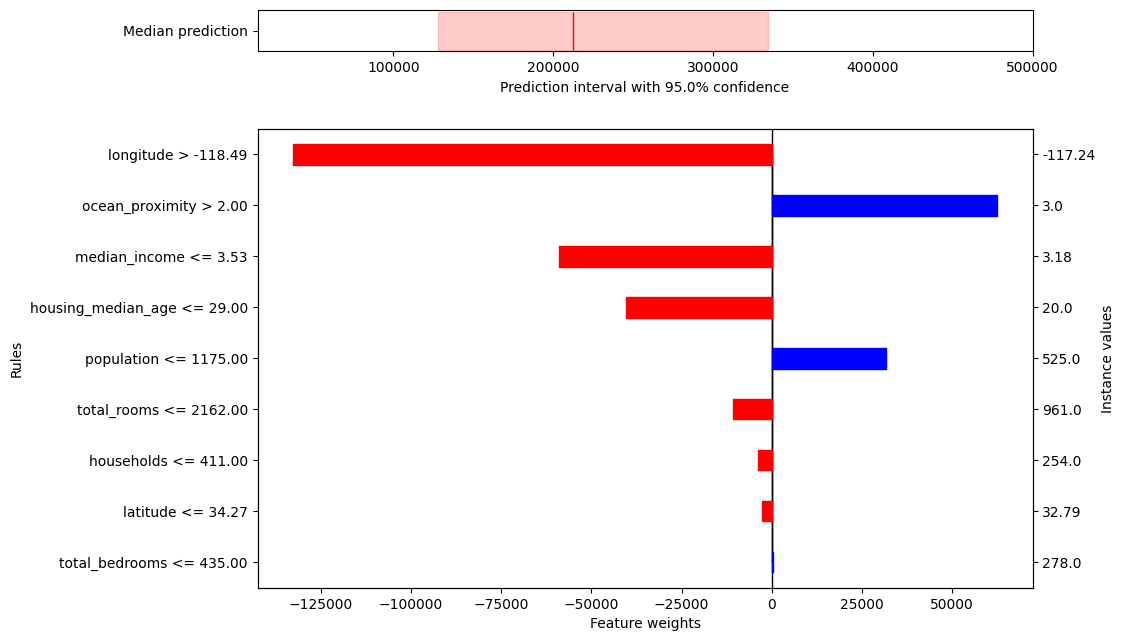

In [11]:
factual_explanation = ce.explain_factual(testX, low_high_percentiles=tsi)
factual_explanation.plot_all()

불확실성 플롯은 정규 플롯과 비슷하지만 각 피처 영향의 불확실성 추정도 함께 제공한다. 여기서 그림자진 구역은 할당된 신뢰 구간(95% 신뢰도 양측 구간)이 가질 수 있는 변화 범위다. 그림자진 구간의 실선은 등각 예측 분포의 중앙값이다.

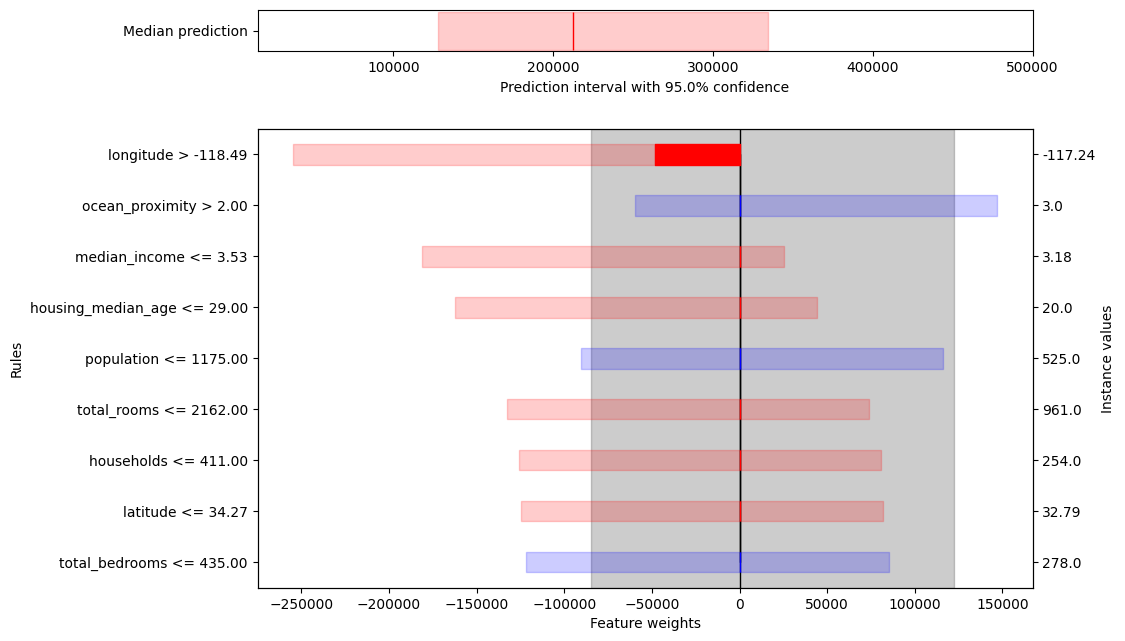

In [12]:
factual_explanation.plot_all(uncertainty=True)

`add_conjunctions` 메서드를 이용하여 조합 규칙을 추가하는 것도 가능하다. 파라미터 없이 호출하면 기본적으로 두 개의 규칙을 조합하지만 `num_rules_combined=3`이라고 파라미터를 주면 최대 3개까지 섞을 수 있다. 기본값으로 5개의 가장 중요한 규칙끼리 조합되지만 `num_to_include` 파라미터를 이용하여 그 값을 조절할 수 있다.

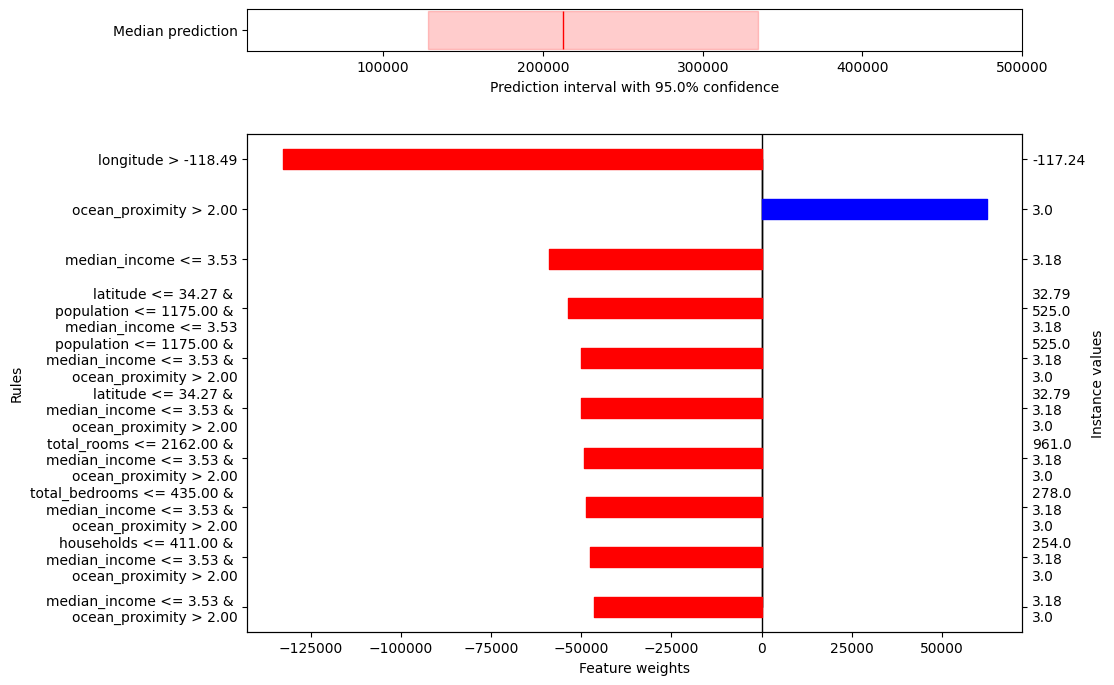

In [13]:
factual_explanation.add_conjunctions(max_rule_size=3).plot_all()

더 이상 조합을 원치 않으면 `remove_conjunctions`로 지울 수 있다.

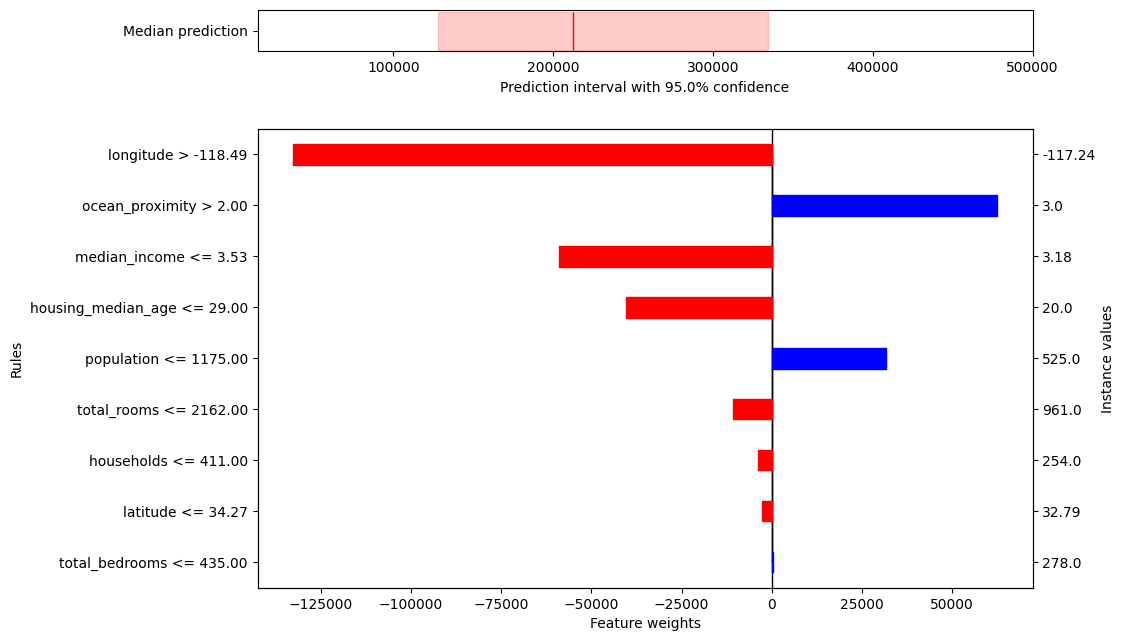

In [14]:
factual_explanation.remove_conjunctions().plot_all()

### One-sided lower-bounded interval with 95% confidence
신뢰도나 구간 타입을 변경하기 위해서는 새로운 설명이 추출되어야만 한다. `low_high_percentiles=osli`를 이용하여 단측 하한 구간을 얻는다.

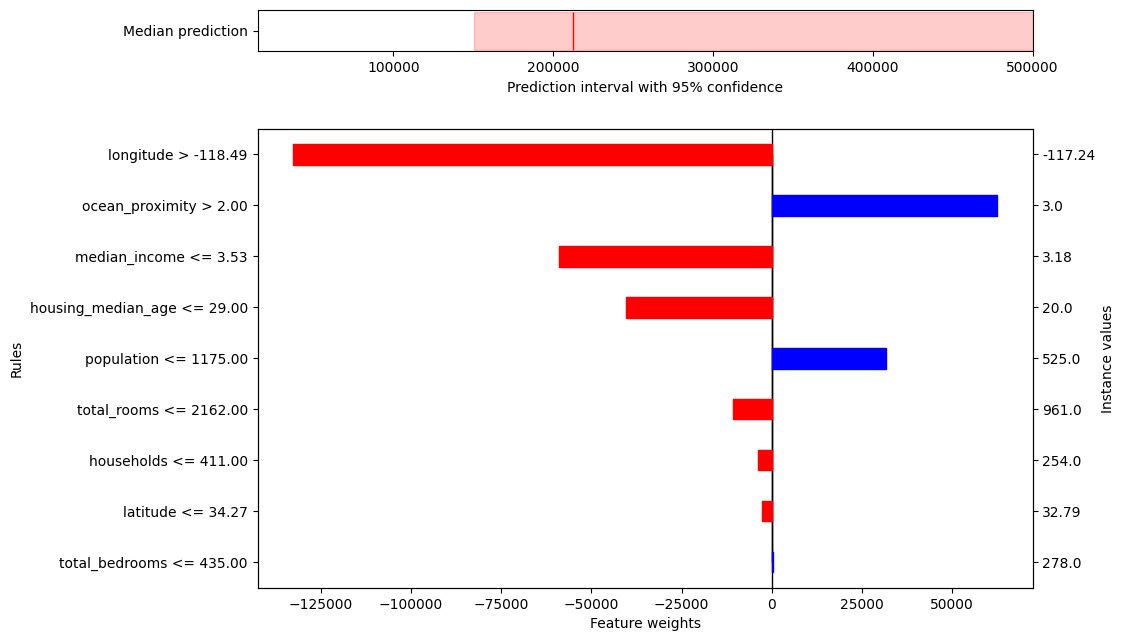

In [15]:
factual_explanation = ce.explain_factual(testX, low_high_percentiles=osli)
factual_explanation.plot_all()

### One-sided upper-bounded interval with 95% confidence
`low_high_percentiles=osui`를 이용하여 단측 상한 구간을 얻는다.

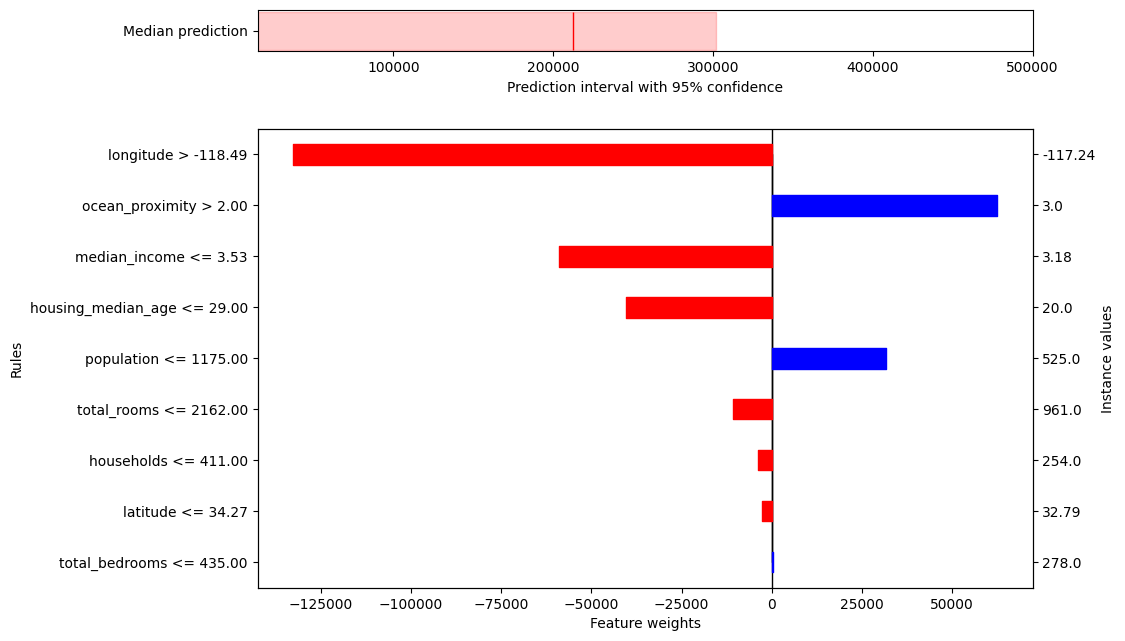

In [16]:
factual_explanation = ce.explain_factual(testX, low_high_percentiles=osui)
factual_explanation.plot_all()

### Two-sided counterfactual rules

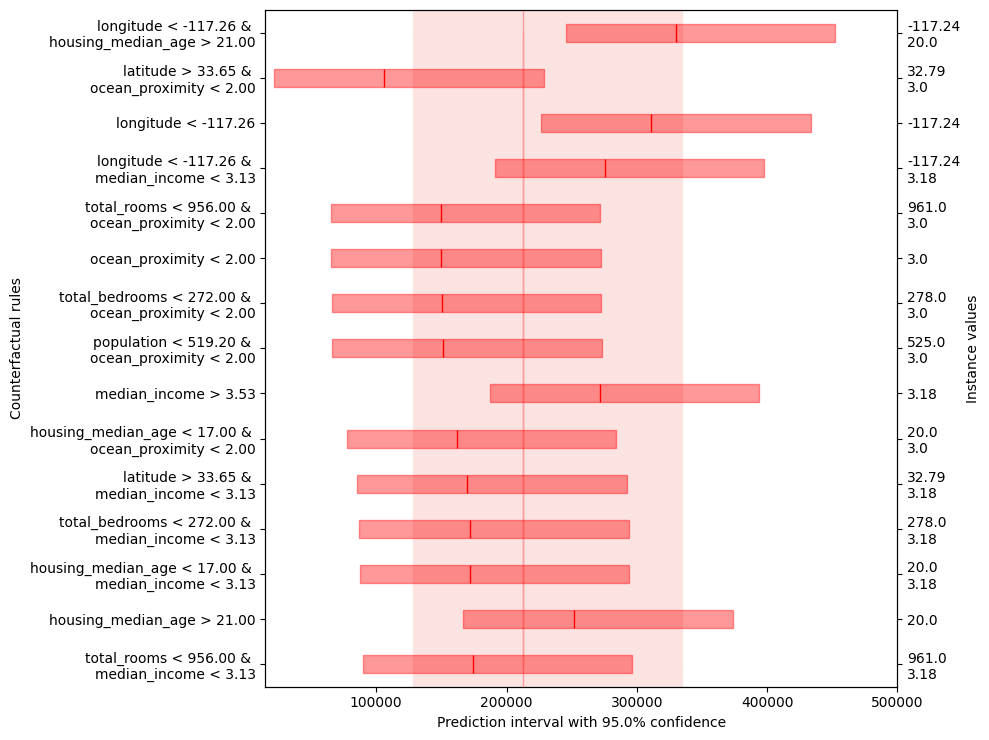

In [17]:
counterfactual_explanation = ce.explain_counterfactual(testX, low_high_percentiles=tsi)
counterfactual_explanation.add_conjunctions(n_top_features=5).plot_all(n_features_to_show=15)

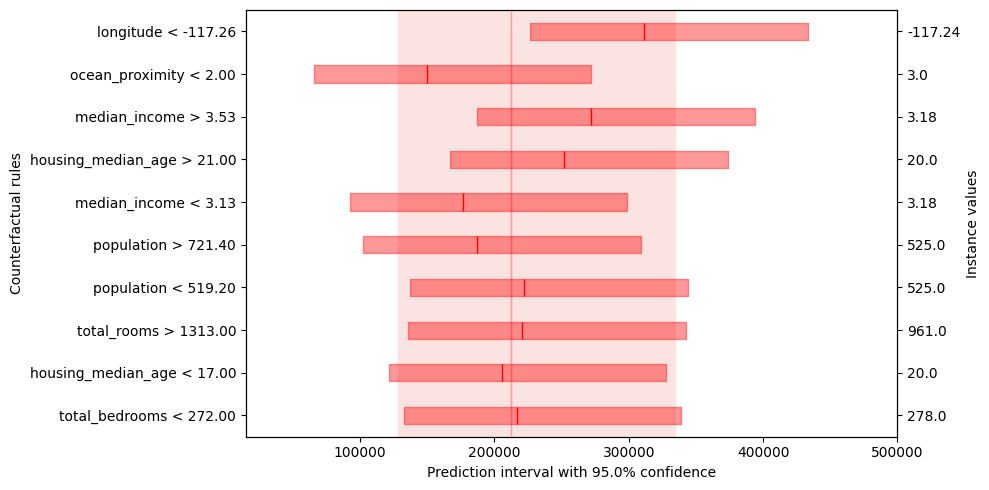

In [18]:
counterfactual_explanation.remove_conjunctions().plot_all()

### One-sided counterfactual rules

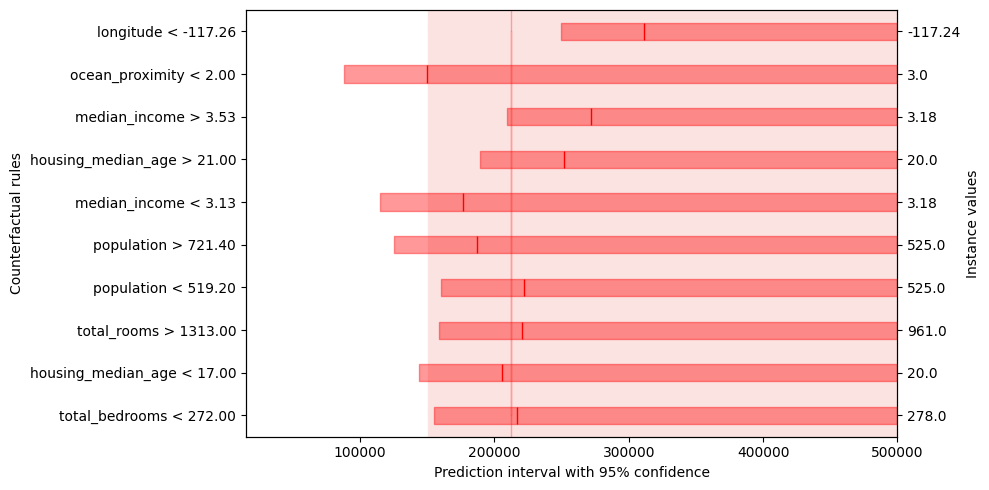

In [19]:
counterfactual_explanation = ce.explain_counterfactual(testX, low_high_percentiles=osli)
counterfactual_explanation.plot_all()

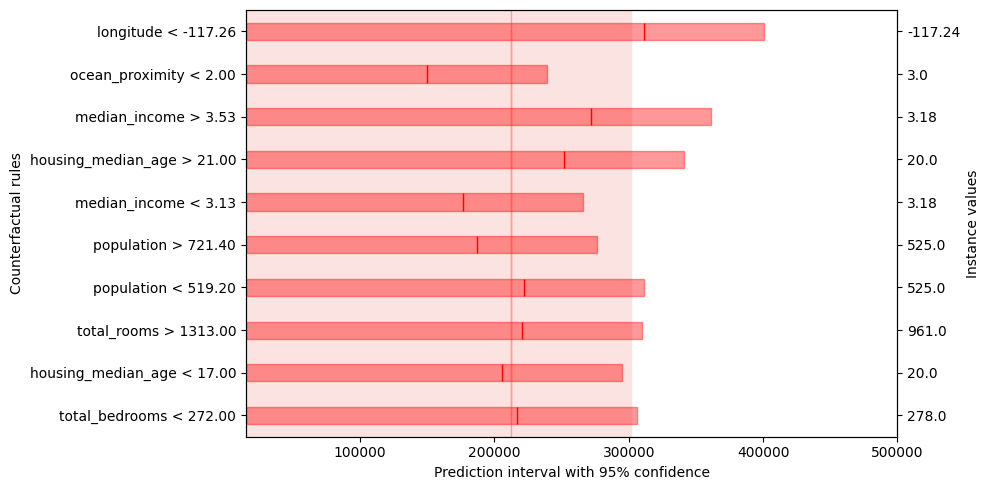

In [20]:
counterfactual_explanation = ce.explain_counterfactual(testX, low_high_percentiles=osui)
counterfactual_explanation.plot_all()

### Normalized explanations using knn
knn을 이용하여 CalibratedExplainer를 위한 어려운 정도 추정기(sigma)를 설정하는 세 가지 방법이 있다.
- 방법 1: 최근접 이웃의 (유클리드) 거리
- 방법 2: 최근접 이웃의 타겟의 표준 편차
- 방법 3: k 최근접 이웃의 절대 오차

`DifficultyEstimator`가 어떻게 작동하는지에 대한 자세한 내용은 [crepes의 문서](https://crepes.readthedocs.io/en/latest/)를 참조하라.

In [32]:
# alternative 1: by the (Euclidean) distances to the nearest neighbors
ce.set_difficulty_estimator(DifficultyEstimator().fit(X=trainX, scaler=True))

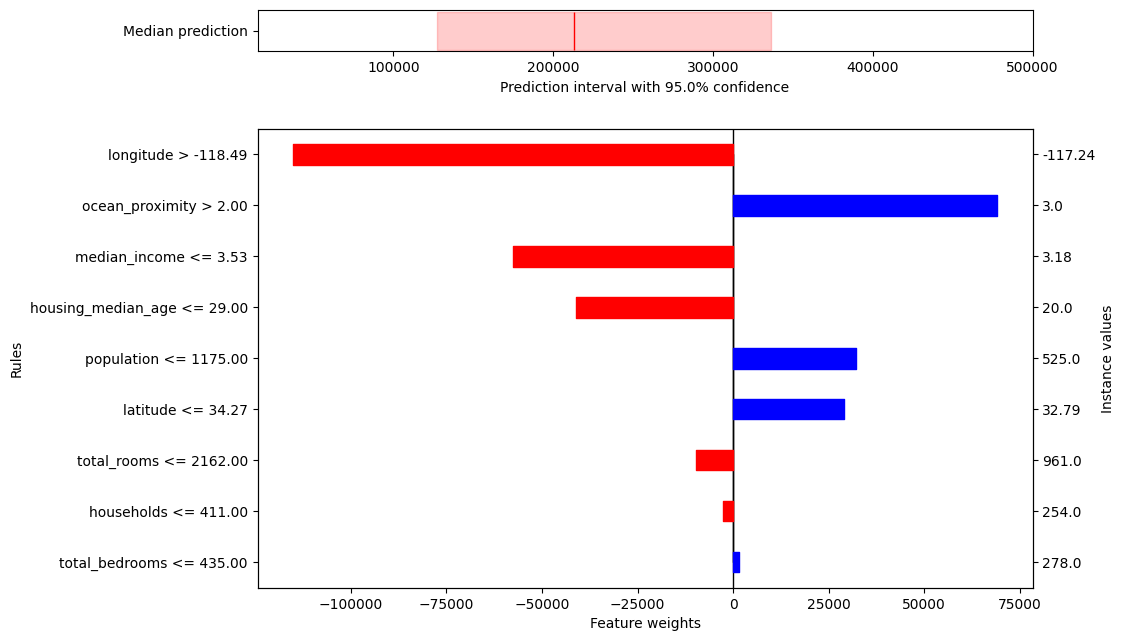

In [33]:
factual_explanation = ce.explain_factual(testX, low_high_percentiles=tsi)
factual_explanation.plot_all(n_features_to_show=15)

In [34]:
# alternative 2: by the standard deviation of the targets of the nearest neighbors
ce.set_difficulty_estimator(DifficultyEstimator().fit(X=trainX, y=trainY, scaler=True))

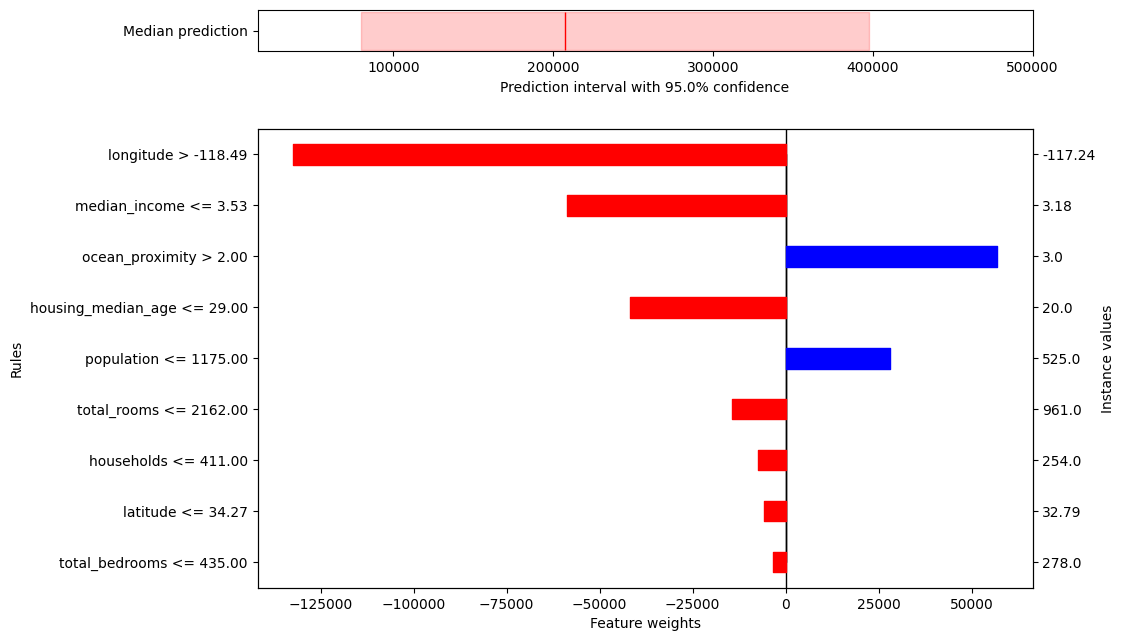

In [35]:
factual_explanation = ce.explain_factual(testX, low_high_percentiles=tsi)
factual_explanation.plot_all(n_features_to_show=15)

In [36]:
# alternative 3: by the absolute errors of the k nearest neighbors
oob_predictions = model.oob_prediction_ # requires the model to have been trained with oob_score=True, available for RandomForestRegressor
residuals_oob = trainY - oob_predictions
ce.set_difficulty_estimator(DifficultyEstimator().fit(X=trainX, residuals=residuals_oob, scaler=True))

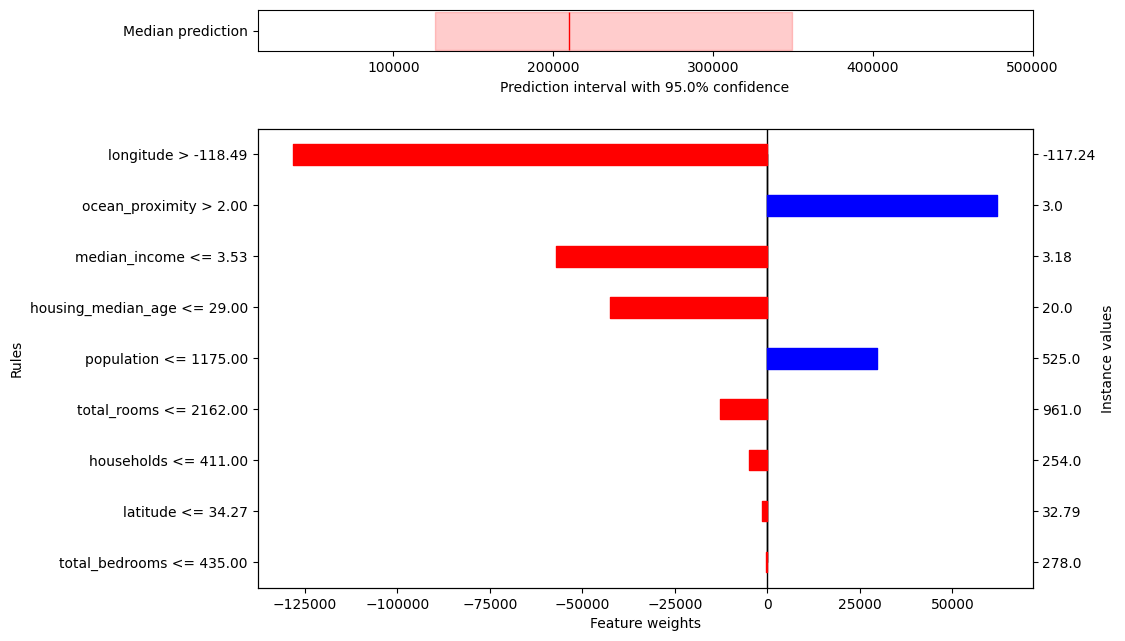

In [37]:
factual_explanation = ce.explain_factual(testX, low_high_percentiles=tsi)
factual_explanation.plot_all(n_features_to_show=15)

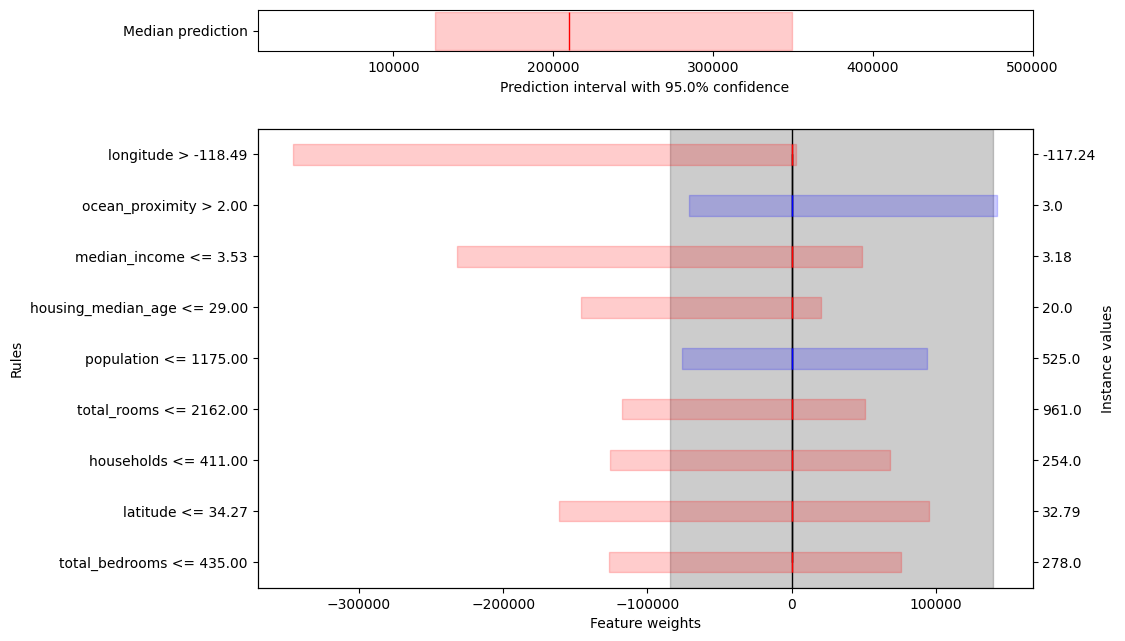

In [38]:
factual_explanation.plot_all(uncertainty=True)

### Normalized counterfactuals using knn

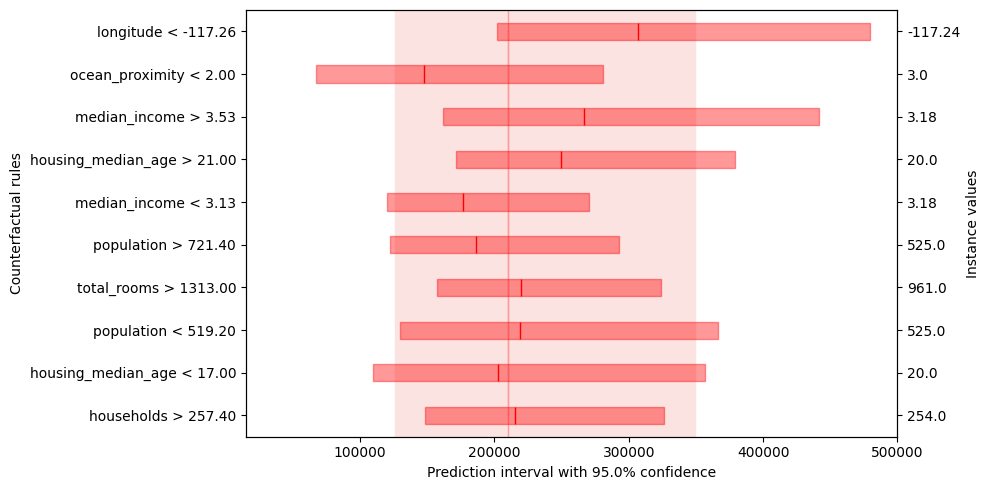

In [39]:
counterfactual_explanation = ce.explain_counterfactual(testX, low_high_percentiles=tsi)
counterfactual_explanation.plot_all()

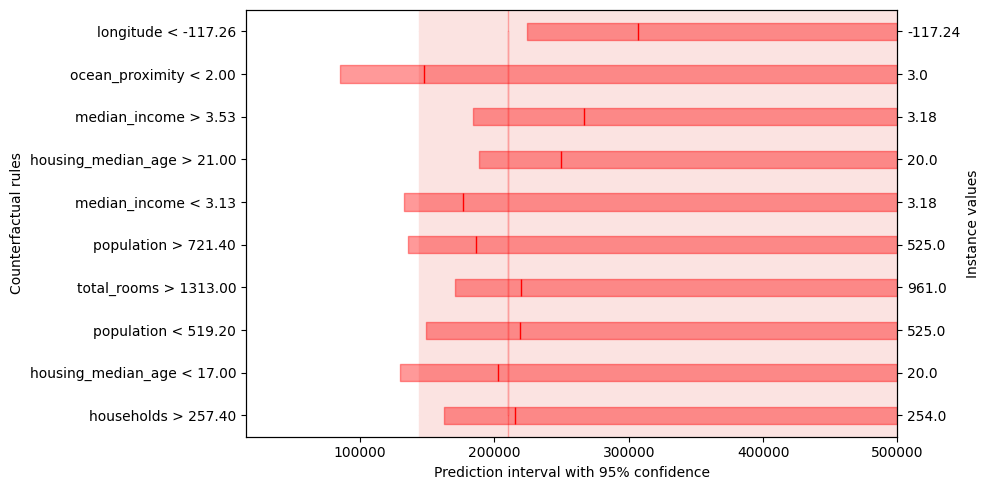

In [41]:
counterfactual_explanation = ce.explain_counterfactual(testX, low_high_percentiles=osli)
counterfactual_explanation.plot_all()

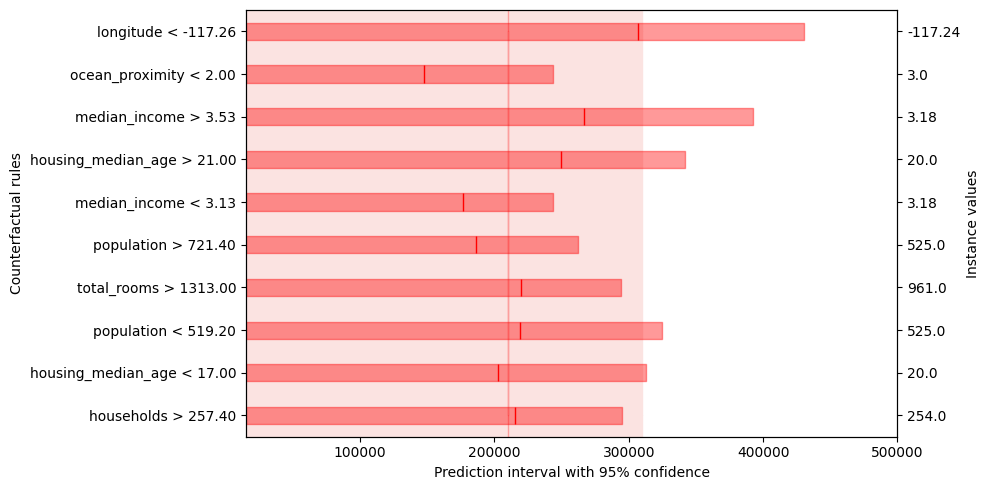

In [40]:
counterfactual_explanation = ce.explain_counterfactual(testX, low_high_percentiles=osui)
counterfactual_explanation.plot_all()

### Normalized explanations using variance

In [42]:
ce.set_difficulty_estimator(DifficultyEstimator().fit(X=trainX, learner=model, scaler=True))

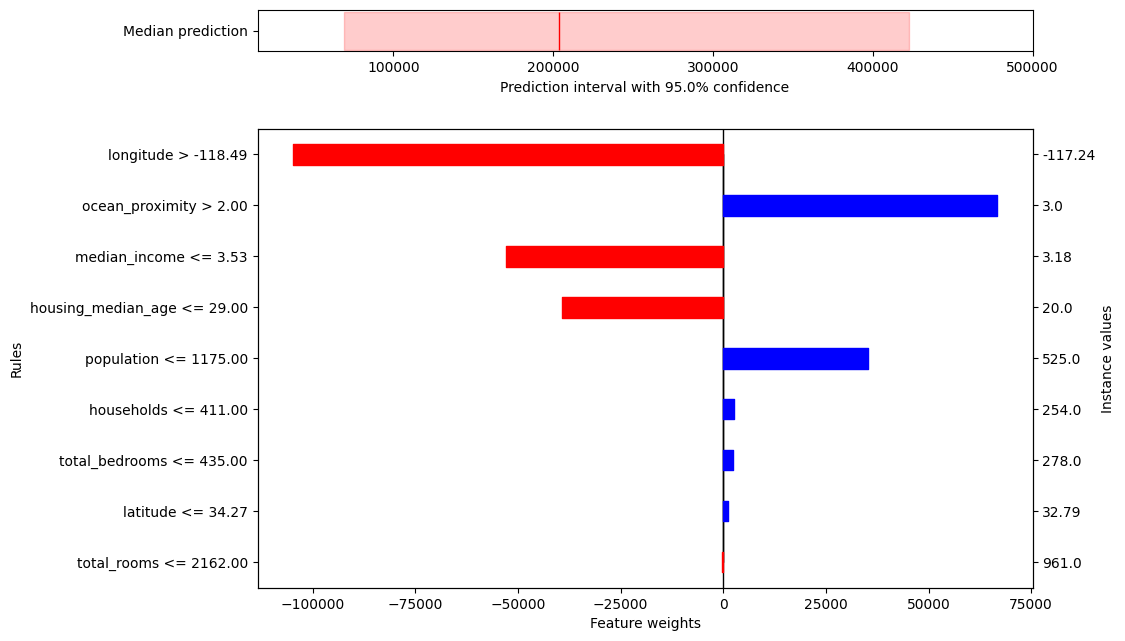

In [43]:
factual_explanation = ce.explain_factual(testX, low_high_percentiles=tsi)
factual_explanation.plot_all()

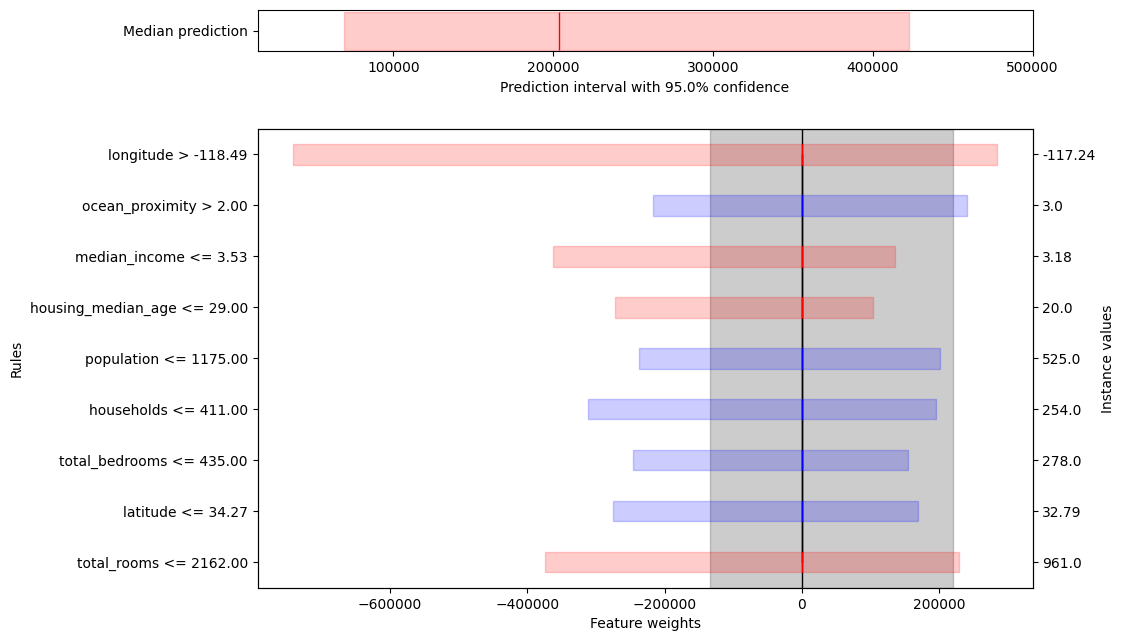

In [44]:
factual_explanation.plot_all(uncertainty=True)

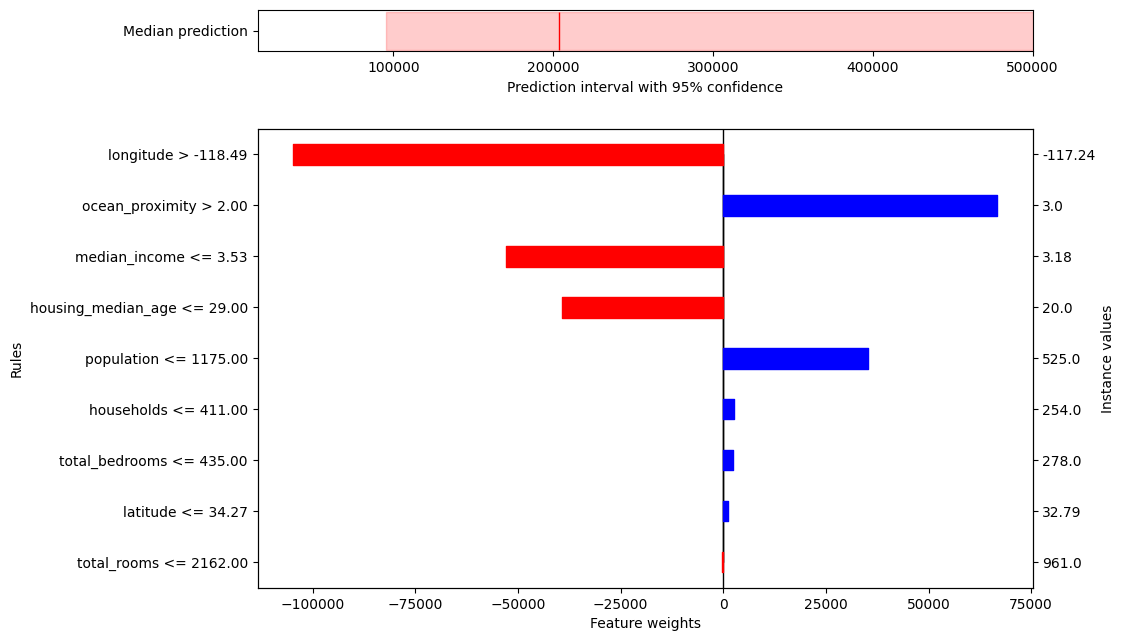

In [45]:
factual_explanation = ce.explain_factual(testX, low_high_percentiles=osli)
factual_explanation.plot_all()

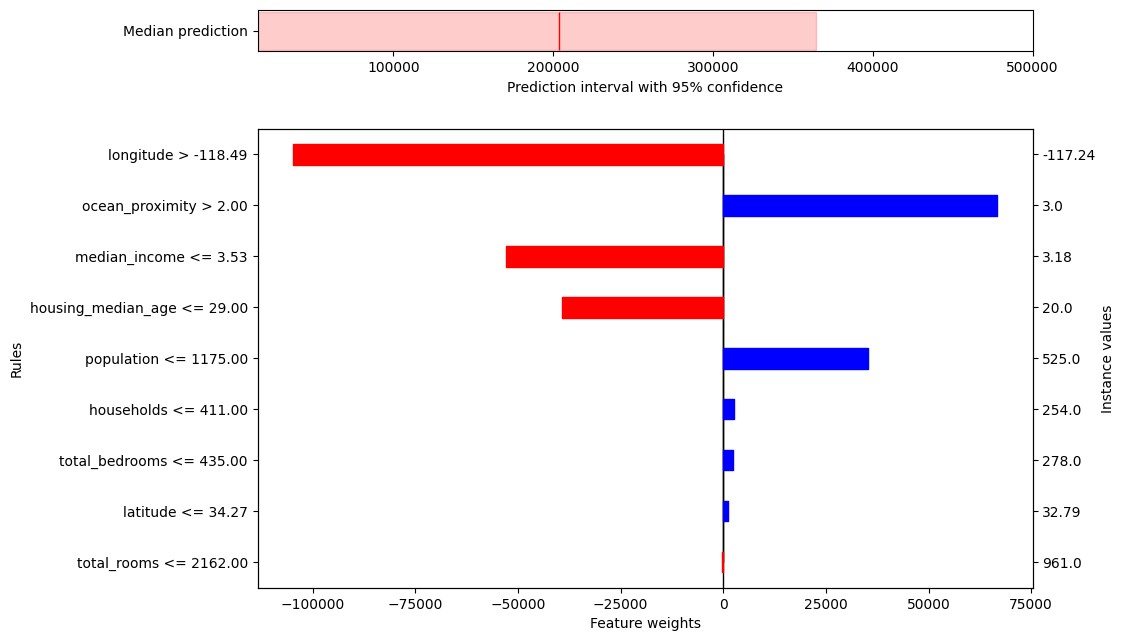

In [46]:
factual_explanation = ce.explain_factual(testX, low_high_percentiles=osui)
factual_explanation.plot_all()

### Normalized counterfactuals using variance

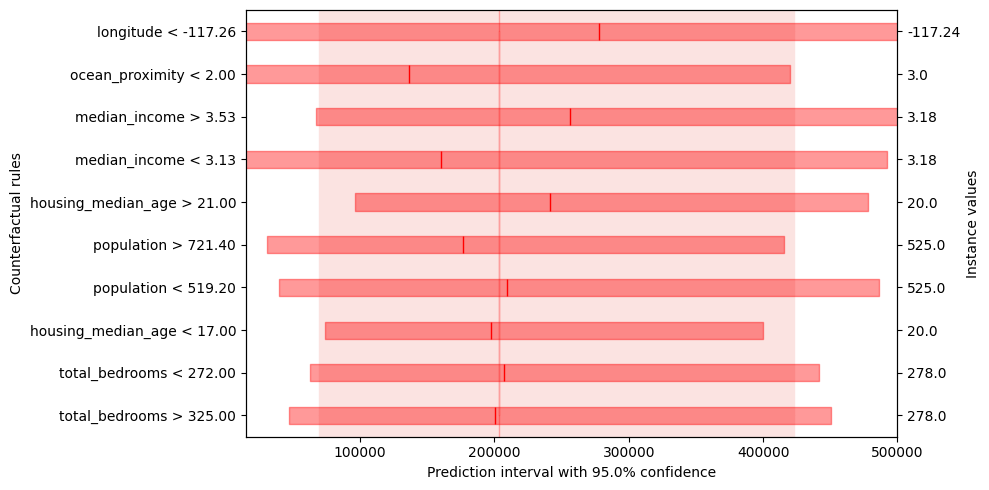

In [47]:
counterfactual_explanation = ce.explain_counterfactual(testX, low_high_percentiles=tsi)
counterfactual_explanation.plot_all()

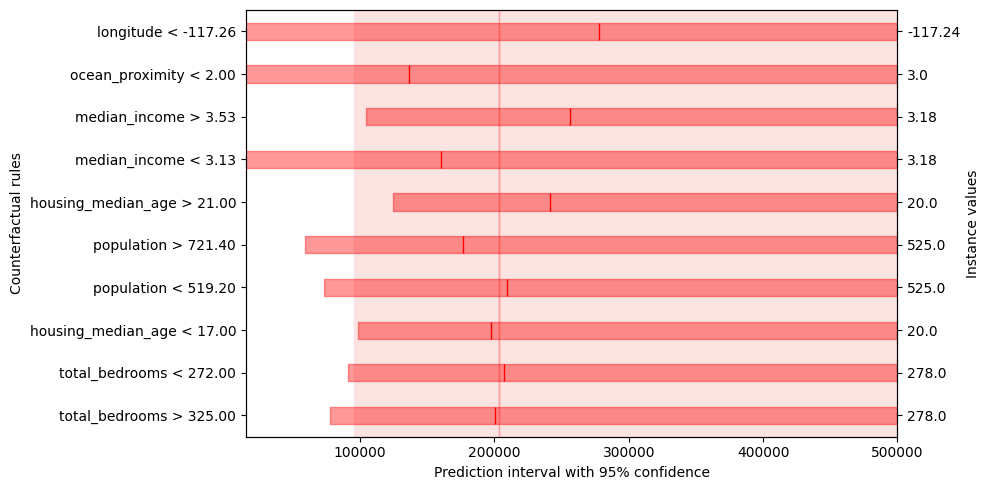

In [48]:
counterfactual_explanation = ce.explain_counterfactual(testX, low_high_percentiles=osli)
counterfactual_explanation.plot_all()

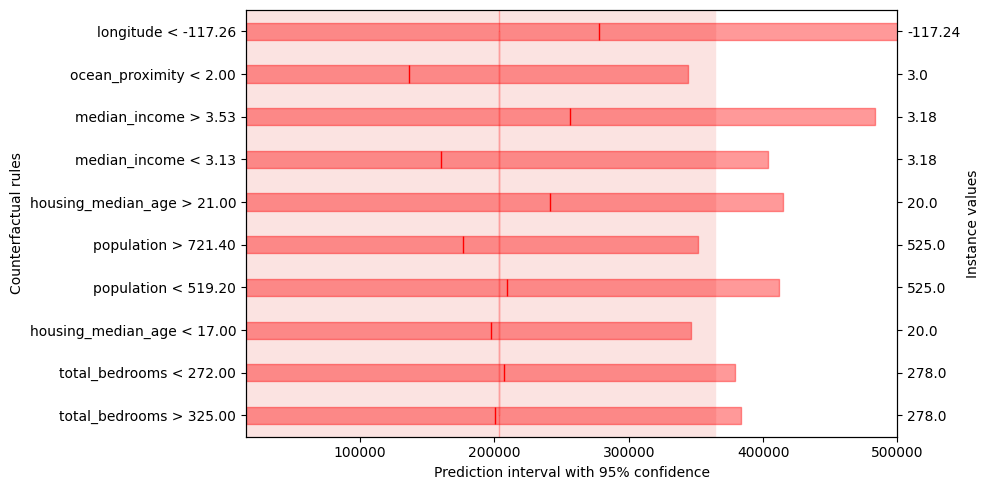

In [49]:
counterfactual_explanation = ce.explain_counterfactual(testX, low_high_percentiles=osui)
counterfactual_explanation.plot_all()